# GENERAL SETTING 

---

This cell is to be run prior to all others. It sets parameters for data loading, plotting and saving.
All other cells are structured to be authonomously run.

In [1]:
import matplotlib.pyplot as  plt
import os

#--- parameters for saving setting ---------------------------------------------
# select if save figures with small font or large font
saveSmall = False
# name of output directory
nameDirOut_largeFont = "Figures"
nameDirOut_smallFont = "Figures_SmallFont"
# parameters for figures saving
rcParamsDict_largeFont = {'font.size': 16,'lines.linewidth':3,'lines.markersize': 6,'figure.autolayout': False}
rcParamsDict_smallFont = {'font.size': 10,'lines.linewidth':2,'lines.markersize': 4,'figure.autolayout': False}
# directory for loading (needs to be organized in subfolders)
dirResults = "../PrintResults/NormOne"


#--- setting figure parameters (label size, etc. and output directory) ---------
if saveSmall: 
    # small font figures
    dirOutFig = nameDirOut_smallFont
    plt.rcParams.update(rcParamsDict_smallFont) 
else:
    # large font figure
    dirOutFig = nameDirOut_largeFont
    plt.rcParams.update(rcParamsDict_largeFont)
# create output directory and subdirectories, if not existing 
os.makedirs(dirOutFig+"/eigenvalues", exist_ok=True)
os.makedirs(dirOutFig+"/plotEigenstate", exist_ok=True)
os.makedirs(dirOutFig+"/nodes", exist_ok=True)
os.makedirs(dirOutFig+"/localMaxima", exist_ok=True)
os.makedirs(dirOutFig+"/velocity", exist_ok=True)
os.makedirs(dirOutFig+"/potential", exist_ok=True)
os.makedirs(dirOutFig+"/FermiWKB", exist_ok=True)
# other figure settings
plt.rcParams.update({'axes.formatter.limits': (-3, 4),'axes.formatter.use_mathtext':True})
# format for num to (scientific) string in labels (2digits)
def latex_float(f):
    if abs(f)<0.01:
        float_str = "{0:.2e}".format(f)
        base, exponent = float_str.split("e")
        return r"{0} \cdot 10^{{{1}}}".format(base, int(exponent))
    elif abs(f)>100:
        float_str = "{0:.0f}".format(f)
        return float_str
    else:
        float_str = "{0:.2f}".format(f)
        return float_str


# EIGENVALUES

---
The eigenvalues are fitted with a power law $\varepsilon(n) = b (n+n_0)^a$.

a =  -2.011561835646143 
b =  0.0012385560816246498 
n0 =  0.77625101239998


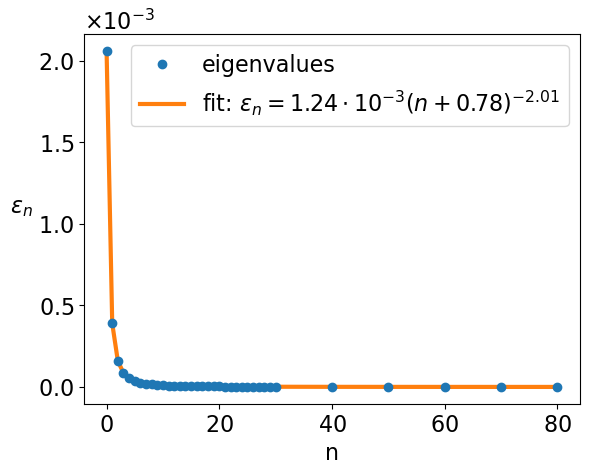

In [2]:
import os
import numpy as np
import matplotlib.pyplot as  plt
from scipy.optimize import least_squares

#load data  
filepath = os.path.join(dirResults+"/neNumData", "neNumData.dat")
n,eigvals = np.loadtxt(filepath, dtype=float, unpack=True)[:,:36]

#power law fit: eig(n) = b *(n+n0)^a  with least squares
def fun(par):
    return par[1] *(n+par[2])**par[0]-eigvals[:]
parGuess = [-2.0,0.1,0.001]
fitEig = least_squares(fun, parGuess, loss='huber')
a,b,n0 = fitEig.x
#cost = fitEig.cost
#opt  = fitEig.optimality
print('a = ',a,'\nb = ',b,"\nn0 = ",n0)

#plot
plt.figure()  
plt.plot(n,eigvals,   'o',label='eigenvalues',zorder=10)
plt.plot(n,b* (n+n0)**a ,'-',label=f'fit: $\\varepsilon_n= {latex_float(b)} (n+{latex_float(n0)})^{{{latex_float(a)}}}$')
plt.xlabel('n')
plt.ylabel('$\\varepsilon_n$')
plt.gca().yaxis.label.set(rotation='horizontal', ha='right')
plt.legend()
#save figure
figname = "eigenvalues_fit"
figpath = os.path.join(dirOutFig+"/eigenvalues",figname)
plt.savefig(figpath,dpi=300,bbox_inches = 'tight')

# PLOT EIGENSTATES  

---

## 1. Plot n-th eigenstate

This cell plots the single $n$-th eigenstate $(f_n(r),g_n(r),\phi_n(r),v_n(r))$ with $g_n(r)\equiv rf_n(r)$ .

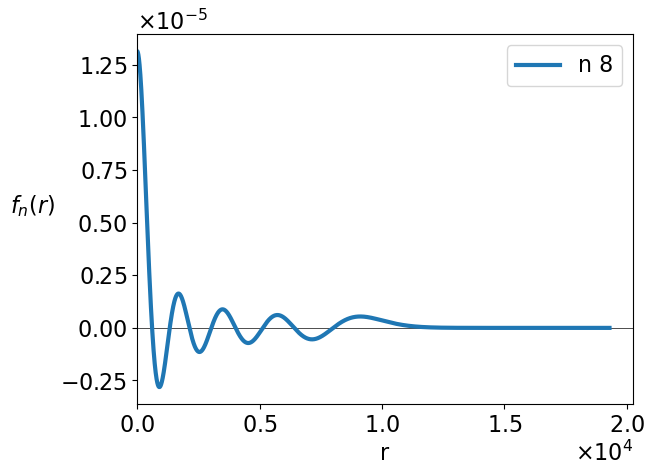

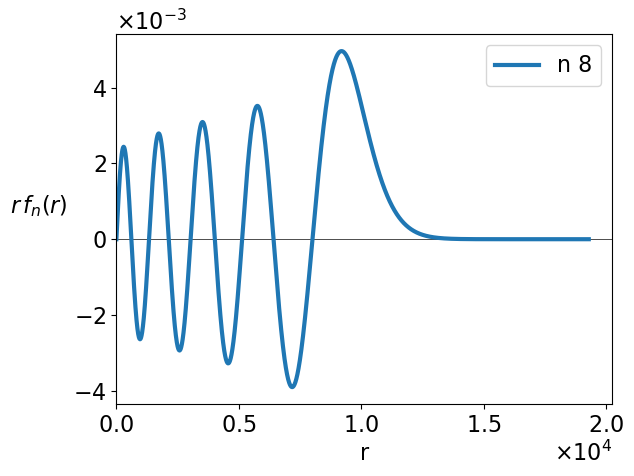

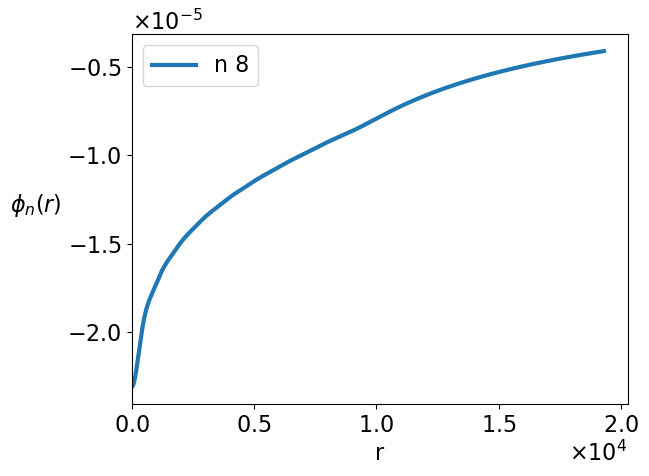

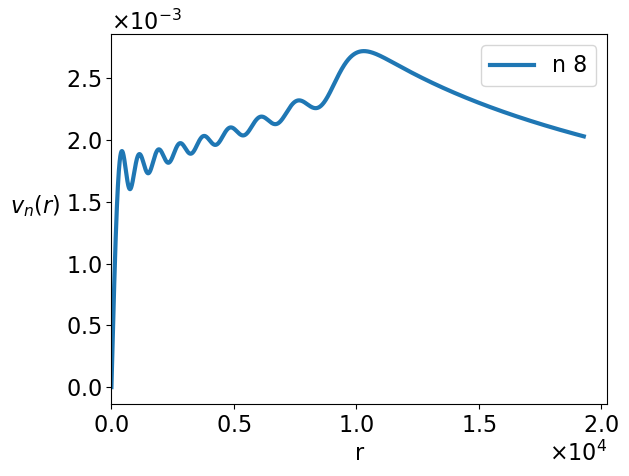

In [3]:
import os
import numpy as np
import matplotlib.pyplot as  plt

nVec = np.array([8])
for i in nVec:
    #load data
    filepath = os.path.join(dirResults+"/rfNumData", "rfNumData_n"+str(i).zfill(3)+".dat")
    r,f = np.loadtxt(filepath, dtype=float,unpack=True)
    g = r*f
    filepath = os.path.join(dirResults+"/rpNumData", "rpNumData_n"+str(i).zfill(3)+".dat")
    r,p = np.loadtxt(filepath, dtype=float,unpack=True)
    filepath = os.path.join(dirResults+"/rvNumData", "rvNumData_n"+str(i).zfill(3)+".dat")
    r,v = np.loadtxt(filepath, dtype=float,unpack=True)

    #plot f(r)
    plt.figure()       
    plt.axhline(y=0, color='black',linewidth='0.7',alpha=0.7)
    plt.plot(r,f,   '-',label=f"n {i}")
    plt.xlabel('r')
    plt.ylabel(f"$f_{{n}}(r)$")
    plt.xlim([0,r[-1]*1.05])
    plt.legend()
    plt.gca().yaxis.label.set(rotation='horizontal', ha='right')
    #save figure
    figname = "eigenfunction_n"+ str(i)
    figpath = os.path.join(dirOutFig+"/plotEigenstate",figname)
    plt.savefig(figpath,dpi=300,bbox_inches = 'tight')

    #plot g(r)
    plt.figure()    
    plt.axhline(y=0, color='black',linewidth='0.7',alpha=0.7)
    plt.plot(r,g,   '-',label=f"n {i}")
    plt.xlabel('r')
    plt.ylabel(f"$r\,f_{{n}}(r)$")
    plt.xlim([0,r[-1]*1.05])
    plt.legend()
    plt.gca().yaxis.label.set(rotation='horizontal', ha='right')

    #plot phi(r)
    plt.figure()    
    plt.plot(r,p,   '-',label=f"n {i}")
    plt.xlabel('r')
    plt.ylabel(f"$\phi_{{n}}(r)$")
    plt.xlim([0,r[-1]*1.05])
    plt.legend()
    plt.gca().yaxis.label.set(rotation='horizontal', ha='right')
    #save figure
    figname = "eigenpotential_n"+ str(i)
    figpath = os.path.join(dirOutFig+"/plotEigenstate",figname)
    plt.savefig(figpath,dpi=300,bbox_inches = 'tight')

    #plot v(r)
    plt.figure()    
    plt.plot(r,v,   '-',label=f"n {i}")
    plt.xlabel('r')
    plt.ylabel(f"$v_{{n}}(r)$")
    plt.xlim([0,r[-1]*1.05])
    plt.legend()
    plt.gca().yaxis.label.set(rotation='horizontal', ha='right')
    #save figure
    figname = "eigenvelocity_n"+ str(i)
    figpath = os.path.join(dirOutFig+"/plotEigenstate",figname)
    plt.savefig(figpath,dpi=300,bbox_inches = 'tight')

## 2. Plot sample eigenstates (for different $n$)

### 2.1. Sample eigenfunctions

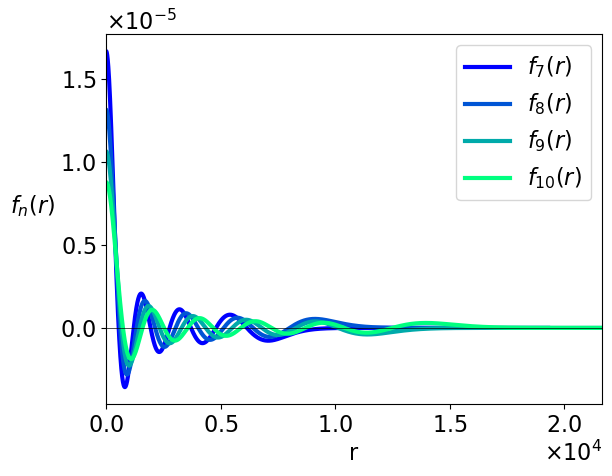

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import colormaps

#set sample n values
nVec = np.array([7,8,9,10])
#set colors
cmap = colormaps.get_cmap('winter') #'jet'
cols = [cmap(i*1./(len(nVec)-1))  for i in range(len(nVec))]
colCount = 0
for i in nVec:
    #load data
    filepath = os.path.join(dirResults+"/rfNumData", "rfNumData_n"+str(i).zfill(3)+".dat")
    r,f = np.loadtxt(filepath, dtype=float,unpack=True)

    #plot f(r)
    plt.figure(1)       
    plt.plot(r,f,   '-',color=cols[colCount],label=f"$f_{{{i}}}(r)$")
    plt.xlabel('r')
    plt.ylabel(f"$f_{{n}}(r)$")
    plt.xlim([0,r[-1]*1.05])
    plt.legend()
    plt.gca().yaxis.label.set(rotation='horizontal', ha='right')
    colCount+=1
    
#figure setting
plt.figure(1)       
plt.axhline(y=0, color='black',linewidth='0.7',alpha=0.7)
plt.xlabel('r')
plt.ylabel(f"$f_{{n}}(r)$")
plt.xlim([0,r[-1]*0.9])
plt.legend()
plt.gca().yaxis.label.set(rotation='horizontal', ha='right')
#save figure
figname = "eigenfunction_examples"
figpath = os.path.join(dirOutFig+"/plotEigenstate",figname)
plt.savefig(figpath,dpi=300,bbox_inches = 'tight')

### 2.2. Sample eigenvelocities

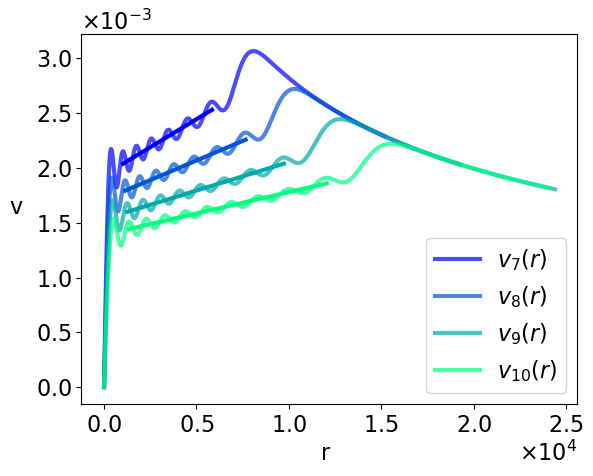

In [5]:
import os
import numpy as np
import matplotlib.pyplot as  plt
from matplotlib import colormaps

# sample n values
nVecPlot = np.array([7,8,9,10])
#set colors
cmap = colormaps.get_cmap('winter') #'jet'
cols = [cmap(i*1./(len(nVecPlot)-1))  for i in range(len(nVecPlot))]
colCount = 0
for i in nVecPlot:
    #load num curves
    filepath = os.path.join(dirResults+"/rvNumData", "rvNumData_n"+str(i).zfill(3)+".dat")
    data = np.loadtxt(filepath, dtype=float)
    r=data[:,0]
    v=data[:,1]

    #extract vmax,rmax local extrema
    derivForw = v[2:]-v[1:-1]
    derivBackw = v[1:-1]-v[:-2]
    changeSign=derivBackw*derivForw
    idxMax = (np.where(changeSign<0)[0] +1)[:2*i+1:2]
    rMax = r[idxMax]
    vMax = v[idxMax]

    #linear fit between start vmax, end vmax - save slopes (and intercepts) 
    idxLeft  = idxMax[ round(i*0.1) ]
    idxRight = idxMax[ round(i*0.9) ]
    m,q = np.polyfit( r[idxLeft:idxRight], v[idxLeft:idxRight], 1)
    #plot num curves with linear fit
    plt.figure(1)
    plt.plot(r,v,'-',color=cols[colCount],alpha=0.7,label=f"$v_{{{i}}}(r)$")
    plt.plot(r[idxLeft:idxRight],m*r[idxLeft:idxRight]+q,'-',color=cols[colCount],label=f"")
    plt.xlabel("r ")
    plt.ylabel("v ")
    plt.legend()
    plt.gca().yaxis.label.set(rotation='horizontal', ha='right')
    colCount +=1

#save figure, velocity examples
plt.figure(1)
figname = "eigenvelocity_examples"
figpath = os.path.join(dirOutFig+"/plotEigenstate",figname)
plt.savefig(figpath,dpi=300,bbox_inches = 'tight')

## 3. Plot detailed eigenfunction 

### 3.1. Detailed Eigenfunction

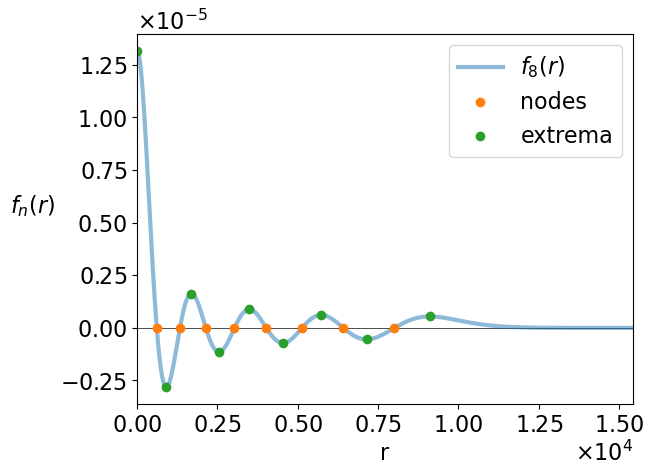

In [6]:
import os
import numpy as np
import matplotlib.pyplot as  plt

# excitation index
n = 8

#load data
filepath = os.path.join(dirResults+"/rfNumData", "rfNumData_n"+str(n).zfill(3)+".dat")
r,f = np.loadtxt(filepath, dtype=float,unpack=True)

#compute nodes
changeSign = f[:-1]*f[1:]
rNodes = r[np.where(changeSign<0)]
fNodes = f[np.where(changeSign<0)]
rNodes = rNodes[:n] # cut spurious at the end (for high n, num sim less accurate, may happen)
fNodes = fNodes[:n] # same
#compute basis of lobes
intervals = rNodes[1:]-rNodes[:-1]

#find local extrema
derivForw = f[2:]-f[1:-1]
derivBackw = f[1:-1]-f[:-2]
changeSign=derivBackw*derivForw
idxExtr = np.concatenate( (np.array([0]), np.where(changeSign<0)[0] +1) )[:n+1] #index of all i+1 extrema in r vector
rExtr = r[idxExtr]
fExtr = f[idxExtr]    #local extrema

#plot f(r)
plt.figure()       
plt.axhline(y=0, color='black',linewidth='0.7',alpha=0.7)
plt.plot(r,f,   '-',label=f"$f_{{{n}}}(r)$",alpha=0.5)
plt.plot(rNodes,fNodes,'o',label="nodes")
plt.plot(rExtr,fExtr,'o',label="extrema")
#text labels
xOffset = r[-1]*0.8 / 50
yOffset = f[0]/30
#figure settings
plt.xlabel('r')
plt.ylabel(f"$f_{{n}}(r)$")
plt.xlim([0,r[-1]*0.8])
plt.legend()
plt.gca().yaxis.label.set(rotation='horizontal', ha='right')

#save figure
figname = "eigenfunction_details_n"+ str(n)
figpath = os.path.join(dirOutFig+"/plotEigenstate",figname)
plt.savefig(figpath,dpi=300,bbox_inches = 'tight')


### 3.2. Zoomed Detailed eigenfunction

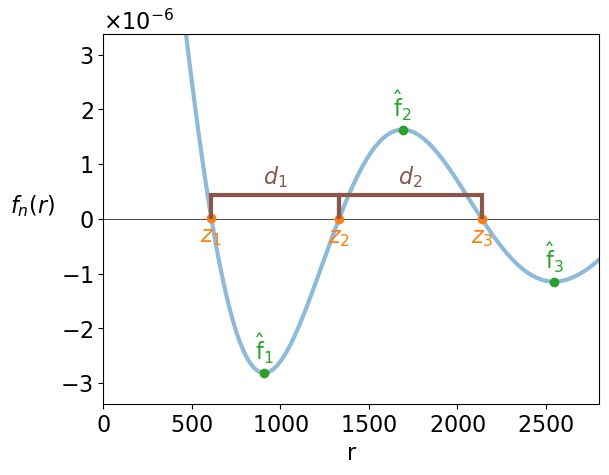

In [7]:
import os
import numpy as np
import matplotlib.pyplot as  plt

# excitation index
n = 8

#load data
filepath = os.path.join(dirResults+"/rfNumData", "rfNumData_n"+str(n).zfill(3)+".dat")
r,f = np.loadtxt(filepath, dtype=float,unpack=True)

#compute nodes
changeSign = f[:-1]*f[1:]
rNodes = r[np.where(changeSign<0)]
fNodes = f[np.where(changeSign<0)]
rNodes = rNodes[:n] # cut spurious at the end (for high n, num sim less accurate, may happen)
fNodes = fNodes[:n] # same
#compute basis of lobes
intervals = rNodes[1:]-rNodes[:-1]

#find local extrema
derivForw = f[2:]-f[1:-1]
derivBackw = f[1:-1]-f[:-2]
changeSign=derivBackw*derivForw
idxExtr = np.concatenate( (np.array([0]), np.where(changeSign<0)[0] +1) )[:n+1] #index of all i+1 extrema in r vector
rExtr = r[idxExtr]
fExtr = f[idxExtr]    #local extrema


#plot f(r)
plt.figure()       
plt.axhline(y=0, color='black',linewidth='0.7',alpha=0.7)
plt.plot(r,f,   '-',label=f"$f_{{{n}}}(r)$",alpha=0.5)
plt.plot(rNodes,fNodes,'o',label="nodes")
plt.plot(rExtr,fExtr,'o',label="extrema")
#text labels
xOffset = r[-1]*0.8 / 100
yOffset = f[0]/30
plt.text(rExtr[1],fExtr[1]+yOffset,r"$\hat{{ \rm f}}_{{1}} $",horizontalalignment="center", verticalalignment="center",color="tab:green")
plt.text(rExtr[2],fExtr[2]+yOffset,r"$\hat{{ \rm f}}_{{{2}}}$",horizontalalignment="center", verticalalignment="center",color="tab:green")
plt.text(rExtr[3],fExtr[3]+yOffset,r"$\hat{{ \rm f}}_{{{3}}}$",horizontalalignment="center", verticalalignment="center",color="tab:green")
#
plt.text(rNodes[0],fNodes[0]-yOffset,f"$z_{{{1}}}$",horizontalalignment="center",color="tab:orange")
plt.text(rNodes[1],fNodes[1]-yOffset,f"$z_{{{2}}}$",horizontalalignment="center",color="tab:orange")
plt.text(rNodes[2],fNodes[2]-yOffset,f"$z_{{{3}}}$",horizontalalignment="center",color="tab:orange")
#
plt.errorbar([rNodes[0],rNodes[1]],[yOffset,yOffset],yerr=np.array([yOffset,yOffset,0,0]).reshape(2,2),color="tab:brown",label="nodal distances")
plt.errorbar([rNodes[1],rNodes[2]],[yOffset,yOffset],yerr=np.array([yOffset,yOffset,0,0]).reshape(2,2),color="tab:brown")
plt.text((rNodes[0]+rNodes[1])/2,1.2*yOffset,f"$d_{{{1}}}$",horizontalalignment="center", verticalalignment="bottom",color="tab:brown")
plt.text((rNodes[1]+rNodes[2])/2,1.2*yOffset,f"$d_{{{2}}}$",horizontalalignment="center", verticalalignment="bottom",color="tab:brown")

#figure settings
plt.xlabel('r')
plt.ylabel(f"$f_{{n}}(r)$")
plt.gca().yaxis.label.set(rotation='horizontal', ha='right')
# zoom
plt.xlim([0,rExtr[3]*1.1])
plt.ylim([fExtr[1]*1.2,-fExtr[1]*1.2])

#save figure
figname = "eigenfunction_zoomedDetails_n"+ str(n)
figpath = os.path.join(dirOutFig+"/plotEigenstate",figname)
plt.savefig(figpath,dpi=300,bbox_inches = 'tight')


## 4. Plot detailed eigenvelocity

### 4.1. Detailed Eigenvelocity

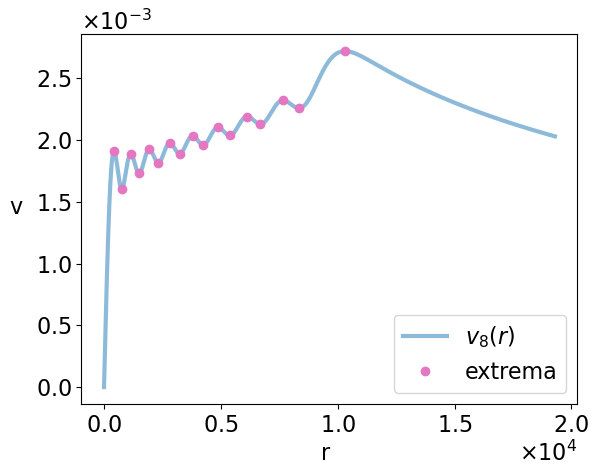

In [8]:
import os
import numpy as np
import matplotlib.pyplot as  plt
from matplotlib import colormaps

#excitation index
n = 8

#load num curves
filepath = os.path.join(dirResults+"/rvNumData", "rvNumData_n"+str(n).zfill(3)+".dat")
r,v = np.loadtxt(filepath, dtype=float,unpack=True)

#extract vmax,rmax local extrema
derivForw = v[2:]-v[1:-1]
derivBackw = v[1:-1]-v[:-2]
changeSign=derivBackw*derivForw
idxMax = (np.where(changeSign<0)[0] +1)[:2*n+1]#[:2*n+1:2]
rMax = r[idxMax]
vMax = v[idxMax]

#plot 
plt.figure()
plt.plot(r,v,'-',alpha=0.5,label=f"$v_{{{n}}}(r)$")
plt.plot(rMax,vMax,'o',color="tab:pink",label="extrema")
plt.xlabel("r ")
plt.ylabel("v ")
plt.gca().yaxis.label.set(rotation='horizontal', ha='right')
plt.legend()

#save figure
figname = "eigenvelocity_details_n"+ str(n)
figpath = os.path.join(dirOutFig+"/plotEigenstate",figname)
plt.savefig(figpath,dpi=300,bbox_inches = 'tight')

### 4.2. Zoomed Detailed Eigenvelocity

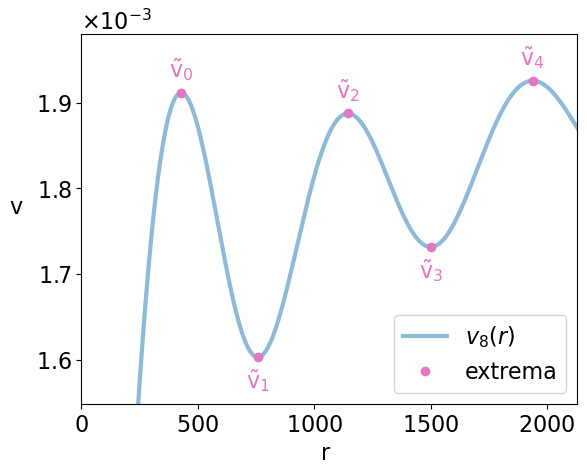

In [9]:
import os
import numpy as np
import matplotlib.pyplot as  plt
from matplotlib import colormaps

# Excitation index
n = 8

#load num curves
filepath = os.path.join(dirResults+"/rvNumData", "rvNumData_n"+str(n).zfill(3)+".dat")
r,v = np.loadtxt(filepath, dtype=float,unpack=True)

#extract vmax,rmax local extrema
derivForw = v[2:]-v[1:-1]
derivBackw = v[1:-1]-v[:-2]
changeSign=derivBackw*derivForw
idxMax = (np.where(changeSign<0)[0] +1)[:2*n+1]#[:2*n+1:2]
rMax = r[idxMax]
vMax = v[idxMax]

#setting
xOffset = r[-1]/100
yOffset = vMax[2*n]/50
#plot 
plt.figure()
plt.plot(r,v,'-',alpha=0.5,label=f"$v_{{{n}}}(r)$")
plt.plot(rMax,vMax,'o',color="tab:pink",label="extrema")
plt.xlabel("r ")
plt.ylabel("v ")
#text
plt.text(rMax[0],vMax[0]+0.5*yOffset,r"$\tilde{{ \rm v}}_{{0}} $",horizontalalignment="center", verticalalignment="center",color="tab:pink")
plt.text(rMax[1],vMax[1]-0.5*yOffset,r"$\tilde{{ \rm v}}_{{1}} $",horizontalalignment="center", verticalalignment="center",color="tab:pink")
plt.text(rMax[2],vMax[2]+0.5*yOffset,r"$\tilde{{ \rm v}}_{{2}} $",horizontalalignment="center", verticalalignment="center",color="tab:pink")
plt.text(rMax[3],vMax[3]-0.5*yOffset,r"$\tilde{{ \rm v}}_{{3}} $",horizontalalignment="center", verticalalignment="center",color="tab:pink")
plt.text(rMax[4],vMax[4]+0.5*yOffset,r"$\tilde{{ \rm v}}_{{4}} $",horizontalalignment="center", verticalalignment="center",color="tab:pink")
#zoom
plt.xlim([0,rMax[4]+xOffset])
plt.ylim([vMax[1]-yOffset,vMax[4]+yOffset])
#setting
plt.legend()
plt.gca().yaxis.label.set(rotation='horizontal', ha='right')

#save figure, velocity examples
figname = "eigenvelocity_zoomedDetails_n"+ str(n)
figpath = os.path.join(dirOutFig+"/plotEigenstate",figname)
plt.savefig(figpath,dpi=300,bbox_inches = 'tight')

### 4.3. Detailed sample eigenvelocity 

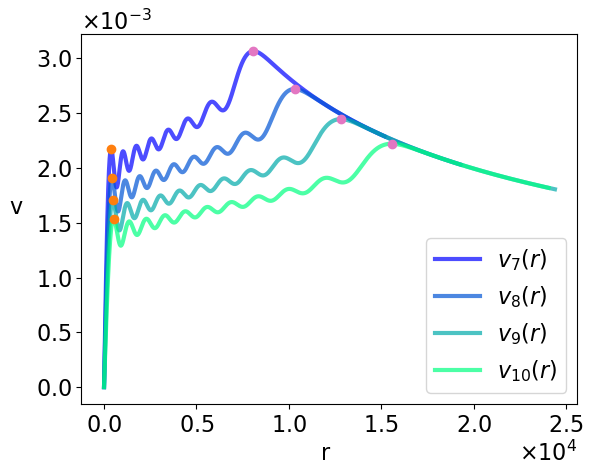

In [10]:
import os
import numpy as np
import matplotlib.pyplot as  plt
from matplotlib import colormaps

# sample n values
nVecPlot = np.array([7,8,9,10])
#set colors
cmap = colormaps.get_cmap('winter') #'jet'
cols = [cmap(i*1./(len(nVecPlot)-1))  for i in range(len(nVecPlot))]
colCount = 0
for i in nVecPlot:
    #load num curves
    filepath = os.path.join(dirResults+"/rvNumData", "rvNumData_n"+str(i).zfill(3)+".dat")
    r,v = np.loadtxt(filepath, dtype=float,unpack=True)

    #extract vmax,rmax local extrema
    derivForw = v[2:]-v[1:-1]
    derivBackw = v[1:-1]-v[:-2]
    changeSign=derivBackw*derivForw
    idxMax = (np.where(changeSign<0)[0] +1)[:2*i+1:2]
    rMax = r[idxMax]
    vMax = v[idxMax]

    #linear fit between start vmax, end vmax - save slopes (and intercepts)
    idxLeft  = idxMax[ round(i*0.1) ]
    idxRight = idxMax[ round(i*0.9) ]
    m,q = np.polyfit( r[idxLeft:idxRight], v[idxLeft:idxRight], 1)
    #plot num curves with linear fit
    plt.figure(1)
    plt.plot(r,v,'-',color=cols[colCount],alpha=0.7,label=f"$v_{{{i}}}(r)$")
    plt.plot(rMax[0],vMax[0],'o',color='tab:orange')
    plt.plot(rMax[-1],vMax[-1],'o',color='tab:pink')
    plt.xlabel("r ")
    plt.ylabel("v ")
    plt.legend()
    plt.gca().yaxis.label.set(rotation='horizontal', ha='right')
    colCount +=1

#save figure, velocity examples
plt.figure(1)
figname = "eigenvelocity_examples_details"
figpath = os.path.join(dirOutFig+"/plotEigenstate",figname)
plt.savefig(figpath,dpi=300,bbox_inches = 'tight')

EIGENFUNCTIONS
---

## 1. Nodes patterns

a_ond = 1.7974084413759492 
b_ond = 247.6336256675473 
c_ond = -564.5855968009654 

a_on = 129.5579226100235 
b_on = -124.797500257052 
c_on = 794.8017661949074 

m_in = 56.32983017266728 
q_in = 187.50353319128308 



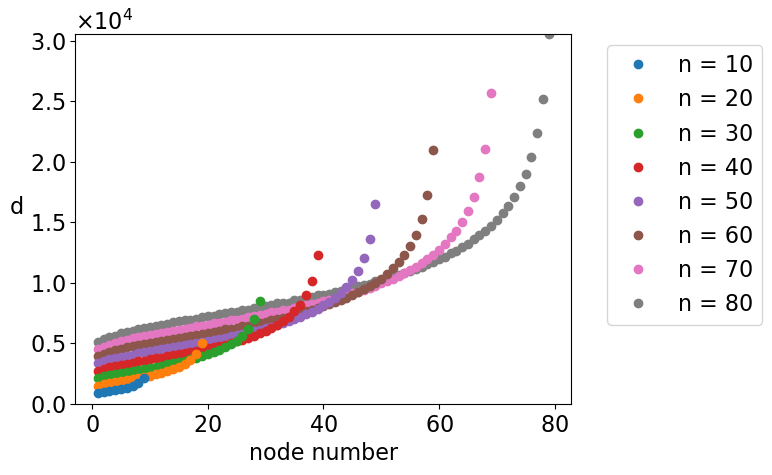

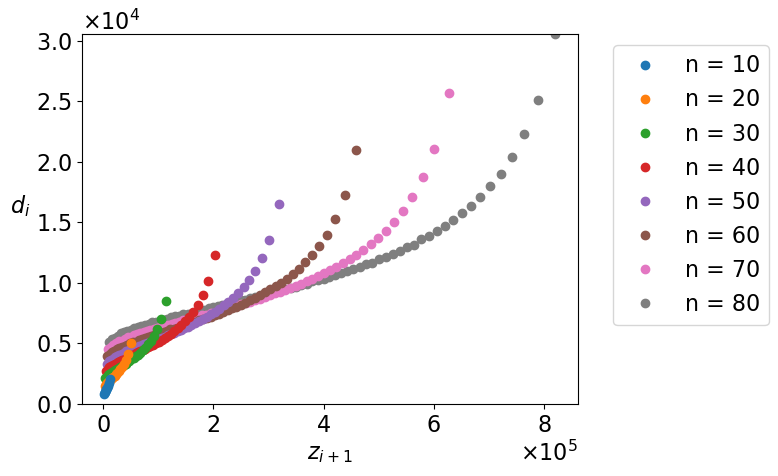

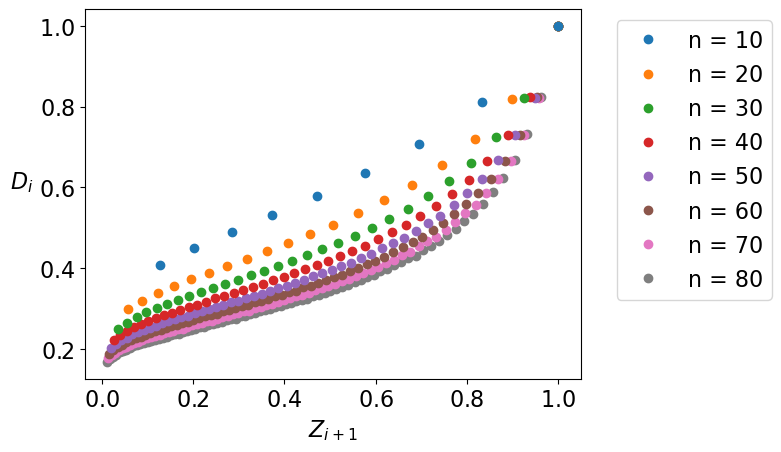

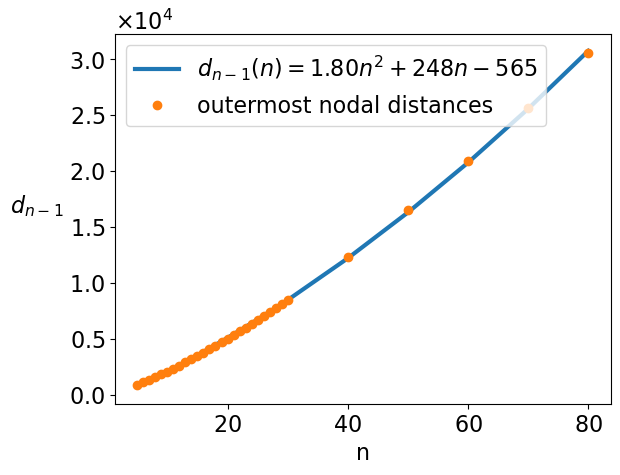

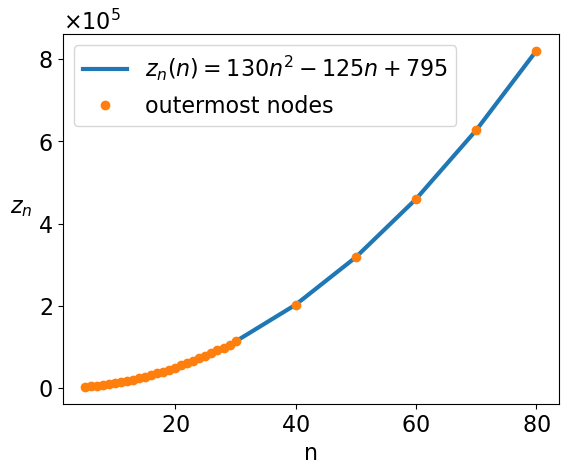

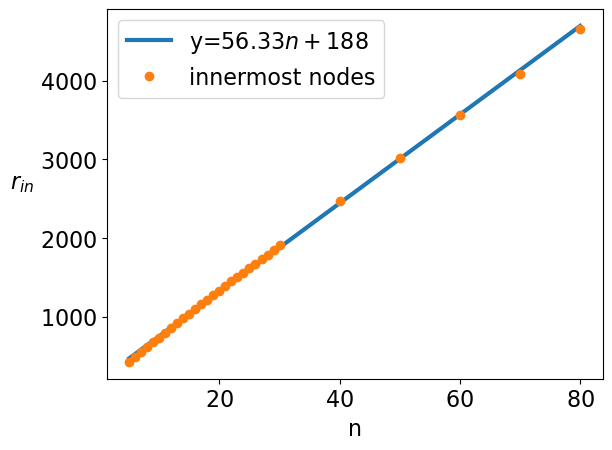

In [11]:
import os
import numpy as np
import matplotlib.pyplot as  plt
import NumParam as nn

# n values (for plot and for fit)
nVecPlot = np.array([10,20,30,40,50,60,70,80])
nVec = np.concatenate( (  np.arange(5,31)  ,np.array([40,50,60,70,80])  )) 
rinn = np.zeros(len(nVec),dtype=float)
rout = np.zeros(len(nVec),dtype=float)
ndout = np.zeros(len(nVec),dtype=float)
for i in nVec:
    filepath = os.path.join(dirResults+"/rfNumData", "rfNumData_n"+str(i).zfill(3)+".dat")
    r,f = np.loadtxt(filepath, dtype=float, unpack=True)

    #compute nodes
    changeSign = f[:-1]*f[1:]
    rNodes = r[np.where(changeSign<0)]
    fNodes = f[np.where(changeSign<0)]
    rNodes = rNodes[:i] # cut spurious extrema at the end (for high n, num sim less accurate, may happen)
    fNodes = np.abs(fNodes[:i]) # same, and take abs value (want all extrema, both max and min)
    rout[np.where(nVec==i)] = rNodes[-1]
    rinn[np.where(nVec==i)] = rNodes[0]
    #compute basis of lobes
    intervals = rNodes[1:]-rNodes[:-1]
    ndout[np.where(nVec==i)] = intervals[-1]

    #plot intervals amplitude - node number
    if i in nVecPlot:
        plt.figure(1)
        plt.plot(np.arange(1,len(intervals)+1),intervals,   'o',label=f"n = {i}",zorder = nVec[-1]-i)
        plt.ylim(0,intervals[-1])
        plt.xlabel("node number")
        plt.ylabel("d")
        plt.legend(bbox_to_anchor=(1.05,1.0),loc='upper left')
        plt.gca().yaxis.label.set(rotation='horizontal', ha='right')

    #plot intervals amplitude - radial position
    if i in nVecPlot:
        plt.figure(2)
        plt.plot(rNodes[1:],intervals,   'o',label=f"n = {i}",zorder = nVec[-1]-i)
        plt.ylim(0,intervals[-1])
        plt.xlabel("$z_{i+1}$")
        plt.ylabel("$d_i$")
        plt.legend(bbox_to_anchor=(1.05,1.0),loc='upper left')
        plt.gca().yaxis.label.set(rotation='horizontal', ha='right')

    #plot intervals amplitude - radial position - rescaled
    rScale = rNodes[-1]
    ndScale = intervals[-1]
    # rScale = nn.a_rOut*i**2 + nn.b_rOut*i + nn.c_rOut
    if i in nVecPlot:
        plt.figure(3)
        plt.plot(rNodes[1:]/rScale, intervals/ndScale,   'o',label=f"n = {i}",zorder = nVec[-1]-i)
        plt.xlabel("$Z_{i+1}$")
        plt.ylabel("$D_i$")
        plt.legend(bbox_to_anchor=(1.05,1.0),loc='upper left')
        plt.gca().yaxis.label.set(rotation='horizontal', ha='right')

#intervals amplitude - radial position
#save figure
plt.figure(2)
figname = "domainIntervals"
figpath = os.path.join(dirOutFig+"/nodes",figname)
plt.savefig(figpath,dpi=300,bbox_inches = 'tight')

#intervals amplitude - radial position - rescaled
#save figure
plt.figure(3)
figname = "domainIntervals_rescaled"
figpath = os.path.join(dirOutFig+"/nodes",figname)
plt.savefig(figpath,dpi=300,bbox_inches = 'tight')

#outermost nodal distance, parabolic fit
a,b,c = np.polyfit(nVec,ndout, 2)
print(f"a_ond = {a} \nb_ond = {b} \nc_ond = {c} \n")
#plot
plt.figure()    
plt.plot(nVec,a*nVec**2+b*nVec+c,   '-', label=f"$d_{{n-1}}(n)={latex_float(a)} n^2 +{latex_float(b)} n {latex_float(c)}$")
plt.plot(nVec,ndout,   'o',label="outermost nodal distances")
plt.xlabel("n")
plt.ylabel("$d_{{n-1}}$")
plt.legend()
plt.gca().yaxis.label.set(rotation='horizontal', ha='right')
#save figure
figname = "nVary_ndon"
figpath = os.path.join(dirOutFig+"/nodes",figname)
plt.savefig(figpath,dpi=300,bbox_inches = 'tight')

#outermost node position, parabolic fit
a,b,c = np.polyfit(nVec,rout, 2)
print(f"a_on = {a} \nb_on = {b} \nc_on = {c} \n")
#plot
plt.figure()    
plt.plot(nVec,a*nVec**2+b*nVec+c,   '-', label=f"$z_{{n}}(n)={latex_float(a)} n^2 {latex_float(b)} n +{latex_float(c)}$")
plt.plot(nVec,rout,   'o',label="outermost nodes")
plt.xlabel("n")
plt.ylabel("$z_{{n}}$")
plt.legend()
plt.gca().yaxis.label.set(rotation='horizontal', ha='right')
#save figure
figname = "nVary_Ron"
figpath = os.path.join(dirOutFig+"/nodes",figname)
plt.savefig(figpath,dpi=300,bbox_inches = 'tight')

#innermost node position, linear fit
m,q =  np.polyfit( nVec,  rinn, 1)
print(f"m_in = {m} \nq_in = {q} \n")
#plot
plt.figure() 
plt.plot(nVec,m*nVec+q,   '-', label=f"y=${latex_float(m)} n+{latex_float(q)}$")
plt.plot(nVec,rinn,   'o',label="innermost nodes")
plt.xlabel("n")
plt.ylabel("$r_{{in}}$")
plt.legend()
plt.gca().yaxis.label.set(rotation='horizontal', ha='right')
#save figure
figname = "nVary_Rin"
figpath = os.path.join(dirOutFig+"/nodes",figname)
plt.savefig(figpath,dpi=300,bbox_inches = 'tight')




## 2. Local extrema

### 2.1. Fixed n

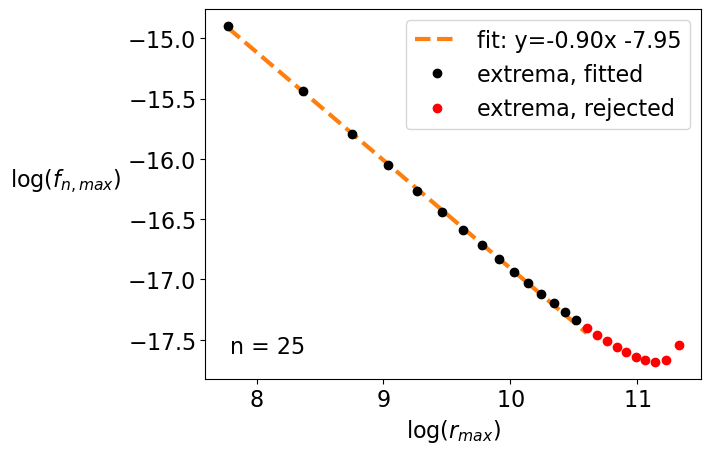

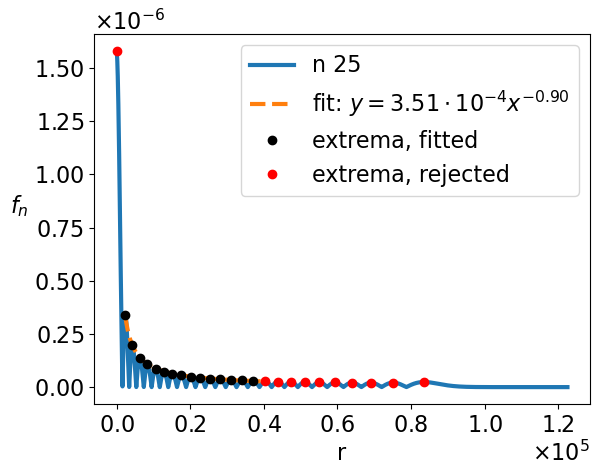

In [12]:
import os
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as  plt

# n value
n = 25
# load numerical data
filepath = os.path.join(dirResults+"/rfNumData", "rfNumData_n"+str(n).zfill(3)+".dat")
r,f = np.loadtxt(filepath, dtype=float,unpack=True)
#find local maxima
derivForw = f[2:]-f[1:-1]
derivBackw = f[1:-1]-f[:-2]
changeSign=derivBackw*derivForw
idxMax = np.concatenate( (np.array([0]), np.where(changeSign<0)[0] +1) )[:n+1] #index of all i+1 extrema in r vector
rMax = r[idxMax]
fMax = np.abs( f[idxMax] )   #local maxima of |f(r)|
#save central value
f0 = np.abs( f[0] )    #local maximum of |f(r)|
#save starting point
rStart = rMax[1]
fStart = fMax[1]
#save outermost extremum
rOut = rMax[-1]
fOut = fMax[-1]

#power law section
#move to log-log (exclude first extremum, since r=0 would diverge in logscale)
logrMax = np.log(rMax[1:])
logfMax = np.log(fMax[1:])
#construct numerical interpolation
spl_pow = CubicSpline(logrMax,logfMax)
logR_extended = np.linspace(logrMax[0],logrMax[-1],num=1001) 
#find minimum
idx_min = np.argmin(spl_pow(logR_extended))
logrMin = logR_extended[idx_min] 
logfMin = spl_pow(logR_extended[idx_min]) 
#save rMin,fMin
rMin = np.exp(logrMin)
fMin = np.exp(logfMin)
#define end position, based on minimum position
percent = 0.95
idx_logrEnd = np.argmin( np.abs(logrMin*percent-logR_extended) ) 
logrEnd = logR_extended[ idx_logrEnd ] 
#save rEnd
rEnd = np.exp(logrEnd)
#set linear interpolation on numerically interpolated data
m,q = np.polyfit(logR_extended[:idx_logrEnd],spl_pow(logR_extended[:idx_logrEnd]),1)
#save power law parameters
alpha = m
beta  = np.exp(q)
#save fEnd
logfEnd = m*logrEnd +q
fEnd = np.exp(logfEnd)

#--- PLOTS ---------------
#plot logscale figure
idxRej = np.where( rMax== (rMax[rMax>np.exp(logR_extended[idx_logrEnd])][0] ) )[0][0]
plt.figure()    
plt.plot( logR_extended[:idx_logrEnd],m*logR_extended[:idx_logrEnd]+q, '--', color="tab:orange", label=f"fit: y={latex_float(m)}x {latex_float(q)}")
plt.plot( logrMax[:idxRej-1],  logfMax[:idxRej-1],   'o',color='black',label="extrema, fitted")
plt.plot( logrMax[idxRej-1:],  logfMax[idxRej-1:],   'o',color='red',label="extrema, rejected")
plt.xlabel(r"log($r_{max}$)")
plt.ylabel(r"log($f_{n,max}$)")
plt.text(0.05, 0.07, f"n = {n}",transform = plt.gca().transAxes)
plt.legend()
plt.gca().yaxis.label.set(rotation='horizontal', ha='right')
#save figure
figname = "extremaLogFit_n25"
figpath = os.path.join(dirOutFig+"/localMaxima",figname)
plt.savefig(figpath,dpi=300,bbox_inches = 'tight')

#plot original scale figure
plt.figure()    
plt.plot( r,np.abs(f),   '-',label=f"n {n}")
plt.plot( np.exp(logR_extended[:idx_logrEnd]),np.exp(m*logR_extended[:idx_logrEnd]+q), '--', label=f"fit: $y={latex_float(np.exp(q))}x^{{{latex_float(m)}}}$")
plt.plot( rMax[0],  fMax[0],   'o',color='red',label="")
plt.plot( rMax[1:idxRej],  fMax[1:idxRej],   'o',color='black',label="extrema, fitted")
plt.plot( rMax[idxRej:],  fMax[idxRej:],   'o',color='red',label="extrema, rejected")
plt.xlabel("r")
plt.ylabel(r"$f_n$")
plt.legend()
plt.gca().yaxis.label.set(rotation='horizontal', ha='right')
#save figure
figname = "extremaFit_n25"
figpath = os.path.join(dirOutFig+"/localMaxima",figname)
plt.savefig(figpath,dpi=300,bbox_inches = 'tight')

### 2.2. Vary n

alpha_f0 = -1.8816527710950053
beta_f0 = 0.0006656232814537857

m_rStart = 82.45289820017001
q_rStart = 288.8862971738147

alpha_fStart = -2.1807604832275316
beta_fStart = 7.901127094028111

a_rMin = 105.15141802166829
b_rMin = 207.39656202468987
c_rMin = -372.1593926191778

alpha_fMin = -1.5070079778077055
beta_fMin = 0.4210641640905319

a_rOut_f = 130.9108780617742
b_rOut_f = 53.53048936165272
c_rOut_f = 340.3178320999541

alpha_fOut = -1.4081570481819001
beta_fOut = 0.2045280226107504

alpha_alpha = -0.30304933762326847
beta_alpha = 0.2822924971086222

alpha1_alpha = -0.4131257340137459
beta1_alpha = 0.3614843372495209

alpha2_alpha = -0.25050881296113625
beta2_alpha = 0.23508842289922258

limit indexes for alpha fit, BIS: n_end = 13, n_start = 21 
alpha_beta = -0.8489942388176521
beta_beta = 0.005298487552979472

m_beta = 0.010627460785413349
q_beta = 0.009877677361839338



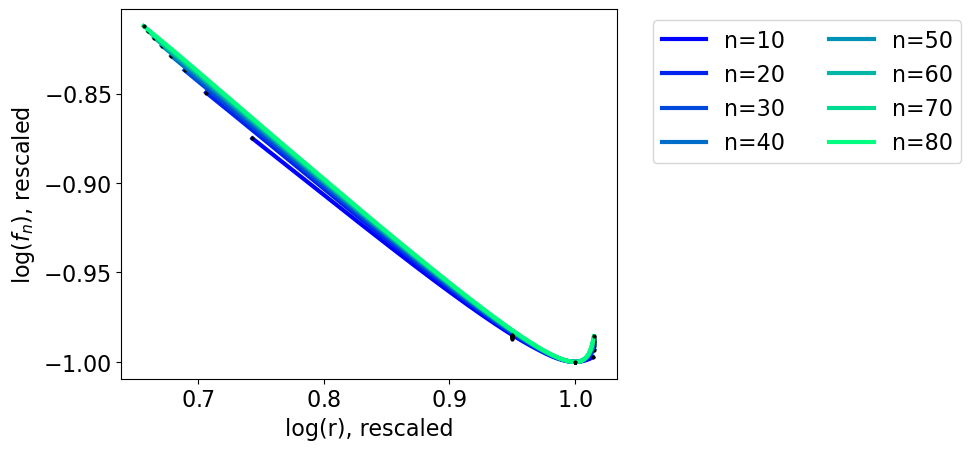

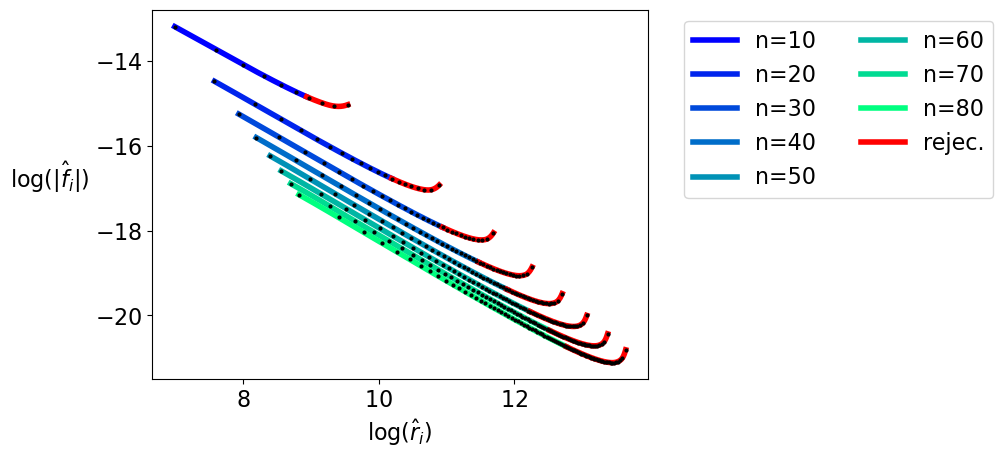

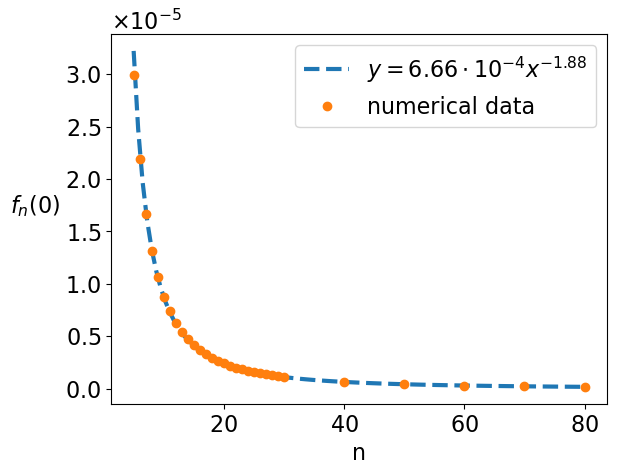

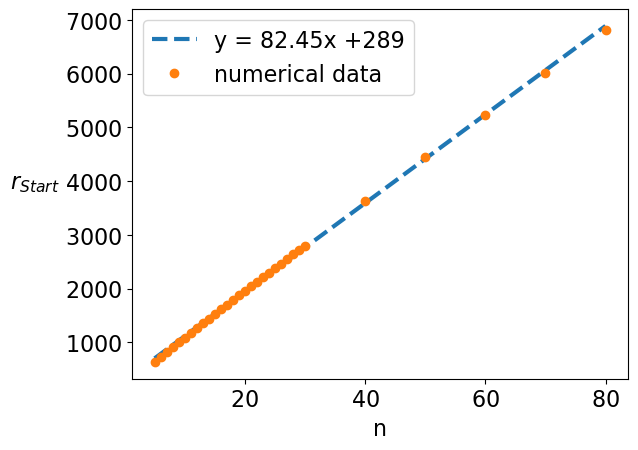

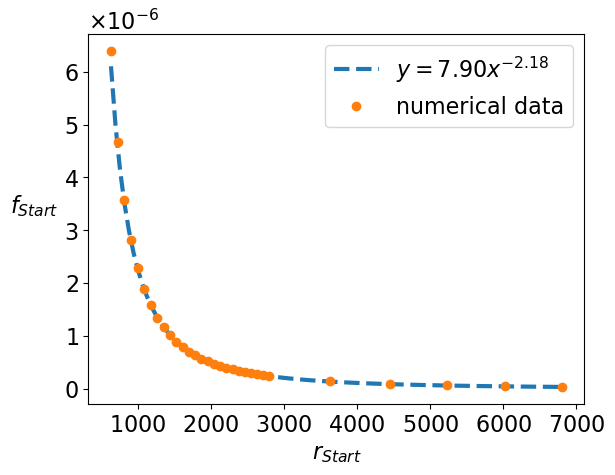

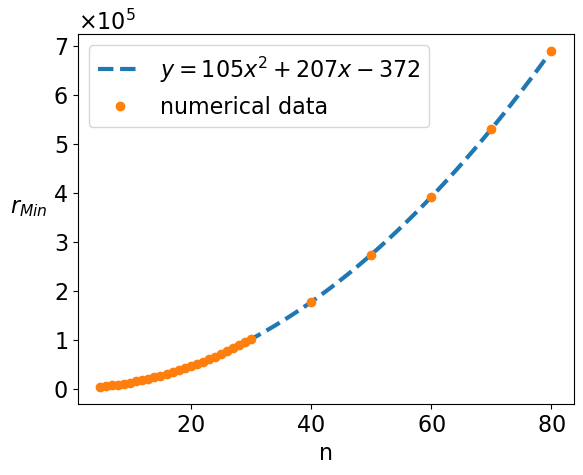

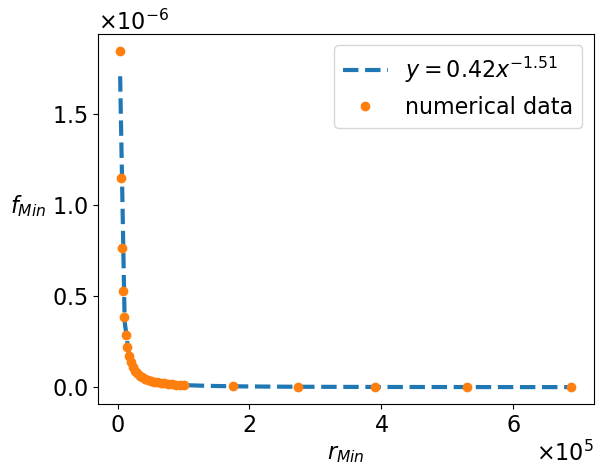

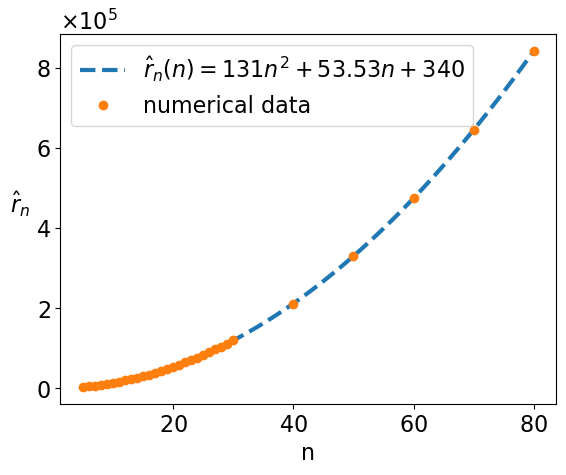

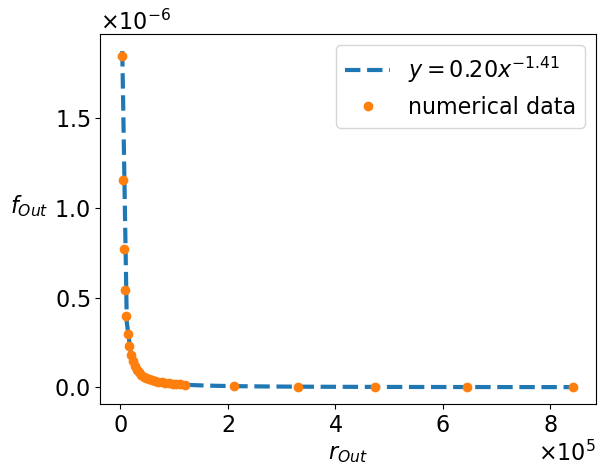

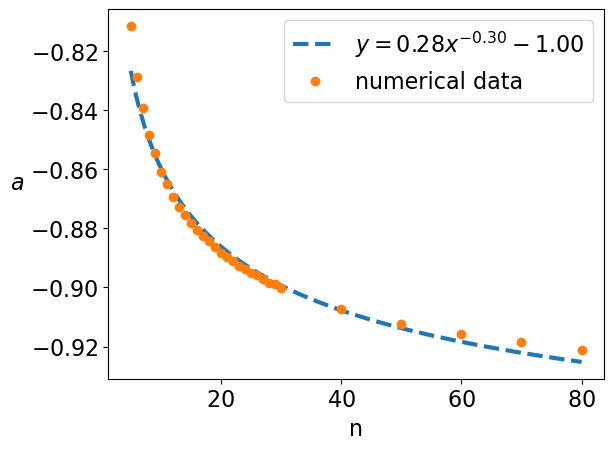

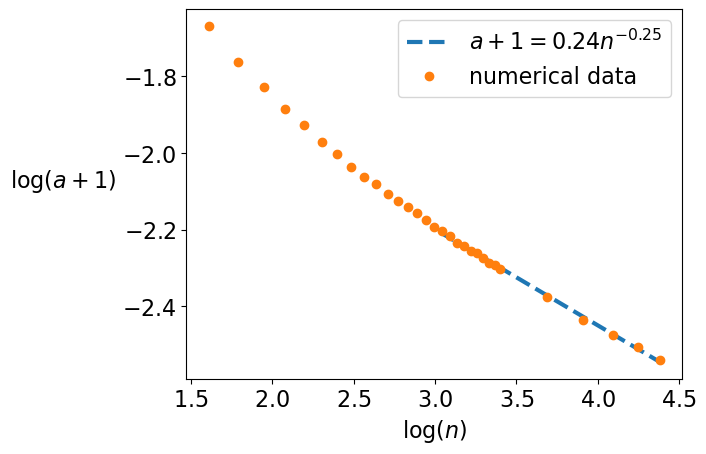

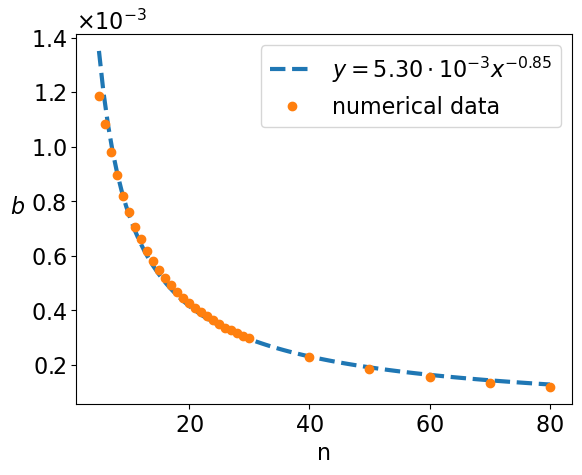

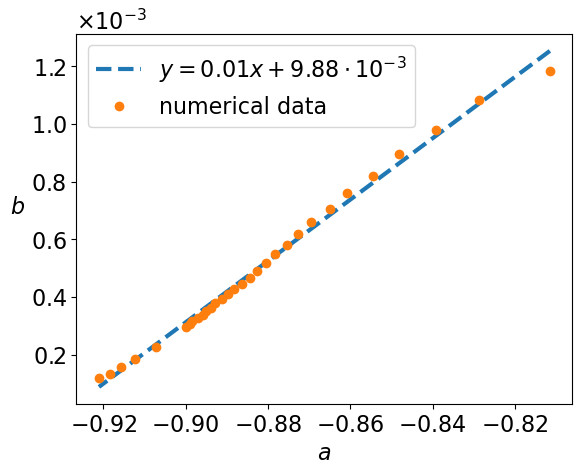

In [13]:
import os
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as  plt
from matplotlib import colormaps

# n values (for plot and for fit)
nVecPlot = np.array([10,20,30,40,50,60,70,80])
nVec = np.concatenate( (np.arange(5,31),np.array([40,50,60,70,80]) )) 

# parameters to be saved as n vary
f0 = np.zeros_like(nVec,dtype=float)
#
rStart = np.zeros_like(nVec,dtype=float)
fStart = np.zeros_like(nVec,dtype=float)
alpha  = np.zeros_like(nVec,dtype=float)
beta   = np.zeros_like(nVec,dtype=float)
rEnd   = np.zeros_like(nVec,dtype=float)
fEnd   = np.zeros_like(nVec,dtype=float)
#
rMin = np.zeros_like(nVec,dtype=float)
fMin = np.zeros_like(nVec,dtype=float)
#
rOut = np.zeros_like(nVec,dtype=float)
fOut = np.zeros_like(nVec,dtype=float)
rDec = np.zeros_like(nVec,dtype=float)
fDec = np.zeros_like(nVec,dtype=float)

#set colors
cmap = colormaps.get_cmap('winter') #'jet'
cols = np.array([cmap(i*1./(len(nVecPlot)-1))  for i in range(len(nVecPlot))])

#SAVE RELEVANT FEATURES AS n VARY
for n in nVec:
    # load numerical data
    filepath = os.path.join(dirResults+"/rfNumData", "rfNumData_n"+str(n).zfill(3)+".dat")
    r,f = np.loadtxt(filepath, dtype=float,unpack=True)
    #find local maxima
    derivForw = f[2:]-f[1:-1]
    derivBackw = f[1:-1]-f[:-2]
    changeSign=derivBackw*derivForw
    idxMax = np.concatenate( (np.array([0]), np.where(changeSign<0)[0] +1) )[:n+1] #index of all i+1 extrema in r vector
    rMax = r[idxMax]
    fMax = np.abs( f[idxMax] )   #local maxima of |f(r)|
    #save central value
    f0[np.where(nVec==n)] = np.abs( f[0] )    #local maximum of |f(r)|
    #save starting point
    rStart[np.where(nVec==n)]= rMax[1]
    fStart[np.where(nVec==n)]= fMax[1]
    #save outermost extremum
    rOut[np.where(nVec==n)]= rMax[-1]
    fOut[np.where(nVec==n)]= fMax[-1]

    #power law section
    #move to log-log (exclude first extremum, since r=0 would diverge in logscale)
    logrMax = np.log(rMax[1:])
    logfMax = np.log(fMax[1:])
    #construct numerical interpolation
    spl_pow = CubicSpline(logrMax,logfMax)
    logR_extended = np.linspace(logrMax[0],logrMax[-1],num=1001) 
    #find minimum
    idx_min = np.argmin(spl_pow(logR_extended))
    logrMin = logR_extended[idx_min] 
    logfMin = spl_pow(logR_extended[idx_min]) 
    #save rMin,fMin
    rMin[np.where(nVec==n)] = np.exp(logrMin)
    fMin[np.where(nVec==n)] = np.exp(logfMin)
    #define end position, based on minimum position
    percent = 0.95
    idx_logrEnd = np.argmin( np.abs(logrMin*percent-logR_extended) ) 
    logrEnd = logR_extended[ idx_logrEnd ] 
    #save rEnd
    rEnd[np.where(nVec==n)] = np.exp(logrEnd)
    #set linear interpolation on numerically interpolated data
    m,q = np.polyfit(logR_extended[:idx_logrEnd],spl_pow(logR_extended[:idx_logrEnd]),1)
    #save power law parameters
    alpha[np.where(nVec==n)] = m
    beta[np.where(nVec==n)]  = np.exp(q)
    #save fEnd
    logfEnd = m*logrEnd +q
    fEnd[np.where(nVec==n)] = np.exp(logfEnd)

    #--- PLOTS ---------------
    #plot logscale figure
    if n in nVecPlot:
        plt.figure(1)
        plt.plot( logR_extended[:idx_logrEnd],spl_pow(logR_extended[:idx_logrEnd]), '-', color=cols[np.where(nVecPlot==n)],linewidth=4, label=f"n={n}")
        if n==nVec[-1]: #handle label 
            plt.plot( logR_extended[idx_logrEnd:],spl_pow(logR_extended[idx_logrEnd:]), '-', color="red",linewidth=4,label=f"rejec.")
            # plt.plot( logR_extended[:idx_logrEnd],m*logR_extended[:idx_logrEnd]+q, '--', color="red",label=f"fit")
        else:
            plt.plot( logR_extended[idx_logrEnd:],spl_pow(logR_extended[idx_logrEnd:]), '-', color="red",linewidth=4,label=f"")
        plt.plot( logrMax,  logfMax,   'o',ms=2,color='black',label="")
        plt.xlabel("log($\hat{{r}}_{i}$)")
        plt.ylabel("log($|\hat{{f}}_{i}|$)")
        plt.legend(bbox_to_anchor=(1.05,1.0),loc='upper left',ncols=2)

    # plot rescaled interpolated curves 
    plt.figure(2)
    if n in nVecPlot:
        plt.plot( logR_extended /logrMin, spl_pow(logR_extended) /np.abs(logfMin), '-', color=cols[np.where(nVecPlot==n)], label=f"n={n}")
        plt.plot( logrMax[0] /logrMin,  logfMax[0] /np.abs(logfMin),   'o',ms=2,color='black',label="")
        plt.plot( logrEnd    /logrMin,  logfEnd    /np.abs(logfMin),   'o',ms=2,color='black',label="")
        plt.plot( logrMin    /logrMin,  logfMin    /np.abs(logfMin),   'o',ms=2,color='black',label="")
        plt.plot( logrMax[-1]/logrMin,  logfMax[-1]/np.abs(logfMin),   'o',ms=2,color='black',label="")
        plt.xlabel("log(r), rescaled")
        plt.ylabel(r"log($f_n$), rescaled")
        plt.legend(bbox_to_anchor=(1.05,1.0),loc='upper left',ncols=2)
    #--- END PLOTS ---------------


#CHECK BEHAVIOR OF RELEVANT FEATURES WITH n
nVec_extended = np.linspace(nVec[0],nVec[-1],num=101)
#save settings
figname = 'nVary_{}'

#save figure fit extrema
plt.figure(1)
plt.gca().yaxis.label.set(rotation='horizontal', ha='right')
# - save figure
figpath = os.path.join(dirOutFig+"/localMaxima",figname.format("logFitExtrema"))
plt.savefig(figpath,dpi=300,bbox_inches = 'tight')


#f0(n)
# - fit: power law
m,q = np.polyfit(np.log(nVec),np.log(f0),1)
print(f"alpha_f0 = {m}\nbeta_f0 = {np.exp(q)}\n")
# - plot
plt.figure()    
plt.plot(nVec_extended, np.exp(q)*nVec_extended**m, '--', label=f"$y = {latex_float(np.exp(q))}x^{{{latex_float(m)}}}$")
plt.plot(nVec, f0, 'o', label="numerical data")
plt.xlabel("n")
plt.ylabel(r"$f_n(0)$")
plt.legend()
plt.gca().yaxis.label.set(rotation='horizontal', ha='right')
# - save figure
figpath = os.path.join(dirOutFig+"/localMaxima",figname.format("f0"))
plt.savefig(figpath,dpi=300,bbox_inches = 'tight')

#rStart(n)
# - fit: linear
m,q = np.polyfit(nVec,rStart,1)
print(f"m_rStart = {m}\nq_rStart = {q}\n")
# - plot
plt.figure()    
plt.plot(nVec_extended, m*nVec_extended+q, '--', label=f"y = {latex_float(m)}x +{latex_float(q)}")
plt.plot(nVec, rStart, 'o', label="numerical data")
plt.xlabel("n")
plt.ylabel(r"$r_{Start}$")
plt.legend()
plt.gca().yaxis.label.set(rotation='horizontal', ha='right')
# - save figure
figpath = os.path.join(dirOutFig+"/localMaxima",figname.format("rStart"))
plt.savefig(figpath,dpi=300,bbox_inches = 'tight')

#fStart(rStart)
# - fit: power law
m,q = np.polyfit(np.log(rStart),np.log(fStart),1)
print(f"alpha_fStart = {m}\nbeta_fStart = {np.exp(q)}\n")
rStart_extended = np.linspace(rStart[0],rStart[-1],num=101)
# - plot
plt.figure()    
plt.plot(rStart_extended, np.exp(q)*rStart_extended**m, '--', label=f"$y = {latex_float(np.exp(q))}x^{{{latex_float(m)}}}$")
plt.plot(rStart, fStart, 'o', label="numerical data")
plt.xlabel(r"$r_{Start}$")
plt.ylabel(r"$f_{Start}$")
plt.legend()
plt.gca().yaxis.label.set(rotation='horizontal', ha='right')
# - save figure
figpath = os.path.join(dirOutFig+"/localMaxima",figname.format("fStart"))
plt.savefig(figpath,dpi=300,bbox_inches = 'tight')

#rMin(n)
# - fit: parabolic
a,b,c = np.polyfit(nVec,rMin,2)
print(f"a_rMin = {a}\nb_rMin = {b}\nc_rMin = {c}\n")
# - plot
plt.figure()    
plt.plot(nVec_extended, a*nVec_extended**2+b*nVec_extended+c, '--', label=f"$y = {latex_float(a)}x^2 +{latex_float(b)}x {latex_float(c)}$")
plt.plot(nVec, rMin, 'o', label="numerical data")
plt.xlabel("n")
plt.ylabel(r"$r_{Min}$")
plt.legend()
plt.gca().yaxis.label.set(rotation='horizontal', ha='right')
# - save figure
figpath = os.path.join(dirOutFig+"/localMaxima",figname.format("rMin"))
plt.savefig(figpath,dpi=300,bbox_inches = 'tight')

#fMin(n)
# - fit: power law
m,q = np.polyfit(np.log(rMin),np.log(fMin),1)
print(f"alpha_fMin = {m}\nbeta_fMin = {np.exp(q)}\n")
rMin_extended = np.linspace(rMin[0],rMin[-1],num=101)
# - plot
plt.figure()    
plt.plot(rMin_extended, np.exp(q)*rMin_extended**m, '--', label=f"$y = {latex_float(np.exp(q))}x^{{{latex_float(m)}}}$")
plt.plot(rMin, fMin, 'o', label="numerical data")
plt.xlabel(r"$r_{Min}$")
plt.ylabel(r"$f_{Min}$")
plt.legend()
plt.gca().yaxis.label.set(rotation='horizontal', ha='right')
# - save figure
figpath = os.path.join(dirOutFig+"/localMaxima",figname.format("fMin"))
plt.savefig(figpath,dpi=300,bbox_inches = 'tight')

#rOut(n)
# - fit: parabolic
a,b,c = np.polyfit(nVec,rOut,2)
print(f"a_rOut_f = {a}\nb_rOut_f = {b}\nc_rOut_f = {c}\n")
# - plot
plt.figure()    
plt.plot(nVec_extended, a*nVec_extended**2+b*nVec_extended+c, '--', label=f"$\hat{{r}}_{{n}}(n) = {latex_float(a)}n^2 +{latex_float(b)}n +{latex_float(c)}$")
plt.plot(nVec, rOut, 'o', label="numerical data")
plt.xlabel("n")
plt.ylabel("$\hat{r}_{{n}}$") 
plt.legend()
plt.gca().yaxis.label.set(rotation='horizontal', ha='right')
# - save figure
figpath = os.path.join(dirOutFig+"/localMaxima",figname.format("rOut"))
plt.savefig(figpath,dpi=300,bbox_inches = 'tight')

#fOut(n)
# - fit: power law
m,q = np.polyfit(np.log(rOut),np.log(fOut),1)
print(f"alpha_fOut = {m}\nbeta_fOut = {np.exp(q)}\n")
rOut_extended = np.linspace(rOut[0],rOut[-1],num=101)
# - plot
plt.figure()    
plt.plot(rOut_extended, np.exp(q)*rOut_extended**m, '--', label=f"$y = {latex_float(np.exp(q))}x^{{{latex_float(m)}}}$")
plt.plot(rOut, fOut, 'o', label="numerical data")
plt.xlabel(r"$r_{Out}$")
plt.ylabel(r"$f_{Out}$")
plt.legend()
plt.gca().yaxis.label.set(rotation='horizontal', ha='right')
# - save figure
figpath = os.path.join(dirOutFig+"/localMaxima",figname.format("fOut"))
plt.savefig(figpath,dpi=300,bbox_inches = 'tight')

# plot alpha(n), one tail
# - fit: power law y = beta*n^alpha -1 
m,q = np.polyfit(np.log(nVec),np.log(alpha+1.0),1)
print(f"alpha_alpha = {m}\nbeta_alpha = {np.exp(q)}\n")
# - plot
plt.figure()    
plt.plot(nVec_extended, np.exp(q)*nVec_extended**m -1.0, '--', label=f"$y = {latex_float(np.exp(q))}x^{{{latex_float(m)}}} -1.00$")
plt.plot(nVec, alpha, 'o', label="numerical data")
plt.xlabel("n")
plt.ylabel(r"$a$")
plt.legend()
plt.gca().yaxis.label.set(rotation='horizontal', ha='right')
# - save figure
figpath = os.path.join(dirOutFig+"/localMaxima",figname.format("alpha"))
plt.savefig(figpath,dpi=300,bbox_inches = 'tight')

# plot alpha(n) two tails
# - fit: power law y = beta*n^alpha -1 
m1,q1 = np.polyfit(np.log(nVec[:round(len(nVec)/2)-8]),np.log(alpha[:round(len(nVec)/2)-8]+1.0),1)
m2,q2 = np.polyfit(np.log(nVec[round(len(nVec)/2):]),np.log(alpha[round(len(nVec)/2):]+1.0),1)
print(f"alpha1_alpha = {m1}\nbeta1_alpha = {np.exp(q1)}\n")
print(f"alpha2_alpha = {m2}\nbeta2_alpha = {np.exp(q2)}\n")
idx_nThresh1 = np.argmin(np.abs( nVec_extended-nVec[round(len(nVec)/2)-8] )) 
idx_nThresh2 = np.argmin(np.abs( nVec_extended-nVec[round(len(nVec)/2)] )) 
print(f"limit indexes for alpha fit, BIS: n_end = {nVec[round(len(nVec)/2)-8]}, n_start = {nVec[round(len(nVec)/2)]} ")
# - plot
plt.figure()    
# plt.plot(np.log(nVec_extended[:idx_nThresh1]), q1+np.log(nVec_extended[:idx_nThresh1])*m1 , '--',color="tab:green", label=r"$a +1"+f" = {latex_float(np.exp(q1))}n^{{{latex_float(m1)}}} $")
plt.plot(np.log(nVec_extended[idx_nThresh2:]), q2+np.log(nVec_extended[idx_nThresh2:])*m2 , '--',color="tab:blue", label=r"$a +1"+f" = {latex_float(np.exp(q2))}n^{{{latex_float(m2)}}} $")
plt.plot(np.log(nVec), np.log(alpha+1.0), 'o',color="tab:orange", label="numerical data")
plt.xlabel(r"$\log(n)$")
plt.ylabel(r"$\log(a+1)$")
plt.legend()
plt.gca().yaxis.label.set(rotation='horizontal', ha='right')
# - save figure
figpath = os.path.join(dirOutFig+"/localMaxima",figname.format("alpha_2tails"))
plt.savefig(figpath,dpi=300,bbox_inches = 'tight')

# plot beta(n)
# - fit: power law y = beta*n^alpha 
m,q = np.polyfit(np.log(nVec),np.log(beta),1)
print(f"alpha_beta = {m}\nbeta_beta = {np.exp(q)}\n")
# - plot
plt.figure()    
plt.plot(nVec_extended, np.exp(q)*nVec_extended**m , '--', label=f"$y = {latex_float(np.exp(q))}x^{{{latex_float(m)}}}$")
plt.plot(nVec, beta, 'o', label="numerical data")
plt.xlabel("n")
plt.ylabel(r"$b$")
plt.legend()
plt.gca().yaxis.label.set(rotation='horizontal', ha='right')
# - save figure
figpath = os.path.join(dirOutFig+"/localMaxima",figname.format("beta"))
plt.savefig(figpath,dpi=300,bbox_inches = 'tight')

# plot beta(alpha)
# - fit: power law
m,q = np.polyfit(alpha,beta,1)
print(f"m_beta = {m}\nq_beta = {q}\n")
alpha_extended = np.linspace(alpha[0],alpha[-1],num=101)
# - plot
plt.figure()    
plt.plot(alpha_extended, m*alpha_extended+q, '--', label=f"$y = {latex_float(m)}x +{latex_float(q)}$")
plt.plot(alpha, beta, 'o', label="numerical data")
plt.xlabel(r"$a$")
plt.ylabel(r"$b$")
plt.legend()
plt.gca().yaxis.label.set(rotation='horizontal', ha='right')
# - save figure
figpath = os.path.join(dirOutFig+"/localMaxima",figname.format("beta-alpha"))
plt.savefig(figpath,dpi=300,bbox_inches = 'tight')



## 3. Approximate eigenfunction

Based on the scaling laws obtained in the previous analysis, this function produces an approximation for $|f_n|(r)$, avoiding the complete numerical simulation of the eigenstate.
The approximation accounts for the central value, the power law fitting the midrange local extrema, and the outermost local extremum.

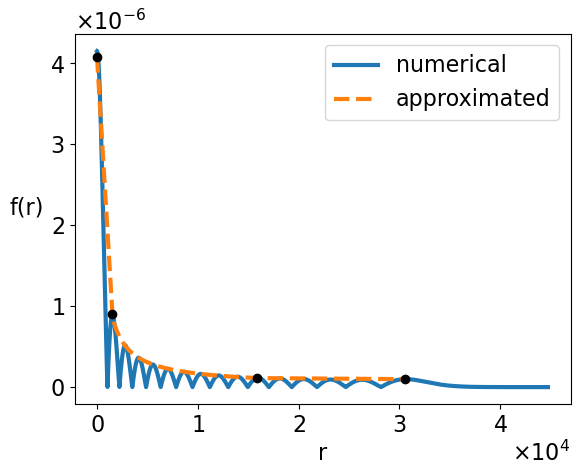

In [14]:
import os
import numpy as np
import matplotlib.pyplot as  plt
import importlib

import NumParam as nn
importlib.reload(nn)

def approxNumF(n):
    """ 
    Given n, construct approximate f(r).
    General features catched by the approximation:
    - Value of the function at r=0 (central value): f0=f(0)
    - Power law in mid-range region: from rStart to rEnd, 
      local extrema (i.e. local maxima of |f(r)| ) are subjected to a power law: |f|_max = beta *r_max^alpha
    - Position and value of the function in its last extremum: rOut, fOut=f(rOut)
    Between (r=0,f(0) ) and (rStart,f(rStart) ), and between (rEnd,f(rEnd) ) and (rOut,fOut), 
    f(r) is approximated by a straight line

    The elevant features catched by the approximation are found via interpolated laws: 
    - Central point: f(n)
    - Power law parameters:
      - rStart(n), fStart(n)
      - rEnd(n),   fEnd(n)
      - alpha(n),  beta(n)
    - Outermost extremum: rOut(n), f_out(n)

    Input:
    - n: number of nodes of required numerical curve
    Output: 
    - rApprox, fApprox: data of approximated curve
    - rPoints, fPoints: coordinates of relevant points, in order: (0,f0) (rStart, fStart) (rEnd,fEnd) (rOut,fOut)
    Requires module: NumParam.py
    """

    # compute relevant features, via known dependences on n
    f0 = nn.beta_f0 * n**nn.alpha_f0
    #
    rStart = nn.m_rStart *n + nn.q_rStart
    fStart = nn.beta_fStart *rStart**nn.alpha_fStart
    #
    rMin = nn.a_rMin *n**2 + nn.b_rMin *n + nn.c_rMin
    fMin = nn.beta_fMin *rMin**nn.alpha_fMin
    rEnd = rMin**0.95
    #
    alpha = nn.beta_alpha *n**nn.alpha_alpha -1.0
    beta = nn.beta_beta *n**nn.alpha_beta
    #
    rOut = nn.a_rOut_f*n**2 + nn.b_rOut_f*n + nn.c_rOut_f
    fOut = nn.beta_fOut * rOut**nn.alpha_fOut

    #computing approximate function
    r = np.linspace(0,rOut, num=1001)
    fApprox = np.zeros_like(r)
    # - from r=0 to r=rStart: linear approx (very rough) 
    #   y-y1 = (y2-y1)/(x2-x1)*(x-x1) --> y = (y2-y1)/(x2-x1)*x +(y1 x2 -x1 y2 )/(x2-x1)
    idx_rStart = np.argmin( np.abs(r-rStart) )
    x1 = 0
    y1 = f0
    x2 = rStart 
    y2 = fStart
    fApprox[0:idx_rStart] = (y2-y1)/(x2-x1) *r[0:idx_rStart] + (y1*x2 -x1*y2 )/(x2-x1)
    # - from rStart to 0.9*rMin: power law: y=beta r^alpha 
    idx_rEnd = np.argmin( np.abs(r-rEnd) )
    fApprox[idx_rStart:idx_rEnd+1] = beta *r[idx_rStart:idx_rEnd+1]**alpha
    fEnd = fApprox[idx_rEnd]
    #from rMin to rOut: linear approx (very rough)
    x1 = rEnd
    y1 = fEnd
    x2 = rOut
    y2 = fOut
    fApprox[idx_rEnd:] =  (y2-y1)/(x2-x1) *r[idx_rEnd:] + (y1*x2 -x1*y2 )/(x2-x1)
    #save reference points
    rPoints = np.array([ r[0],rStart, rEnd, rOut ])
    fPoints = np.array([ f0,  fStart, fEnd, fOut ])
    #MAY BE INTERESTING TO ADD EXTRA POINT eg r95 or r99 for decline after last maxima, beyond which fApprox =0

    return [r,fApprox,rPoints,fPoints,alpha,beta]

#--- Testing the function for approximating the eigenfunction ---------------------------
# trial n value
n = 15  
#compute approximation
r,fApprox,rPoints,fPoints,alpha,beta = approxNumF(n)
#n values for which the exact curve is available
nAvailable = np.concatenate( (  np.arange(0,31)  ,np.array([40,50,60,70,80,90,100])  )) 

# plot approximate function
plt.figure()    
if np.any(nAvailable == n): #available exact numerical curve
    #load numerical curve
    filepath = os.path.join(dirResults+"/rfNumData", "rfNumData_n"+str(n).zfill(3)+".dat")
    rNum,fNum = np.loadtxt(filepath, dtype=float, unpack=True)
    #plot numerical curve
    plt.plot(rNum,np.abs(fNum), '-', label="numerical")
plt.plot(r,fApprox,'--', label="approximated")
for i in range(len(rPoints)):   
    plt.plot(rPoints[i],fPoints[i],'o',color="black",label="")
plt.xlabel("r")
plt.ylabel("f(r)")
plt.gca().yaxis.label.set(rotation='horizontal', ha='right')
plt.legend()


# EIGENPOTENTIAL
---

alpha_phi0 = -1.81650481e+00
beta_phi0  = -1.02181702e-03

alpha_m = -1.97378494e+00
beta_m  = 2.20333088e-04

alpha_q = -1.81468612e+00
beta_q  = -1.86434655e-03

alpha_a = -1.83548740e+00
beta_a  = -3.49529818e-03

alpha_b = -1.84333716e+00
beta_b  = 7.80929594e-04



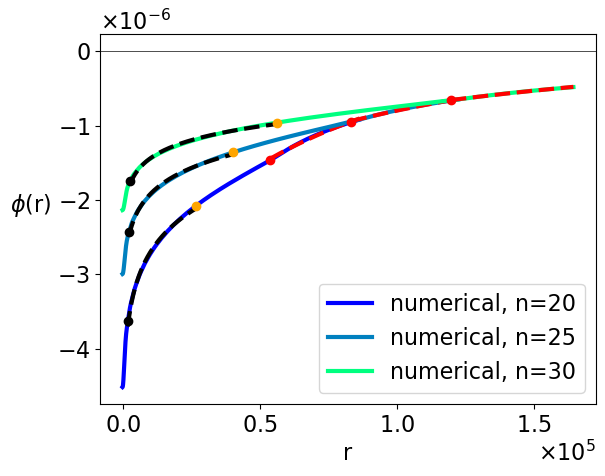

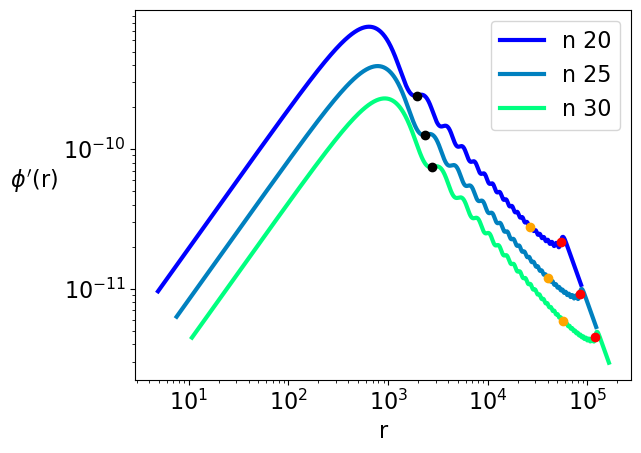

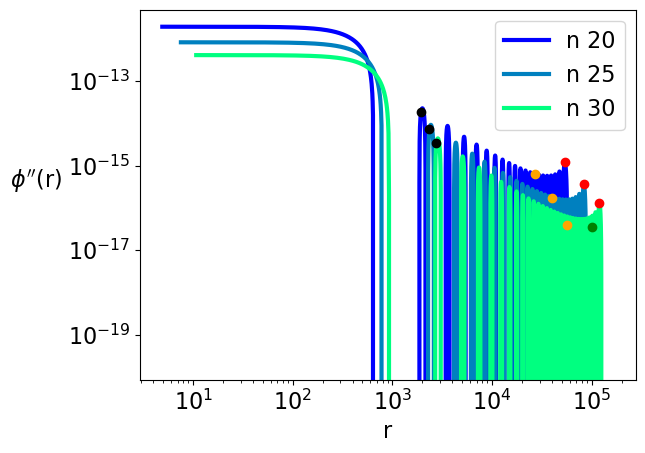

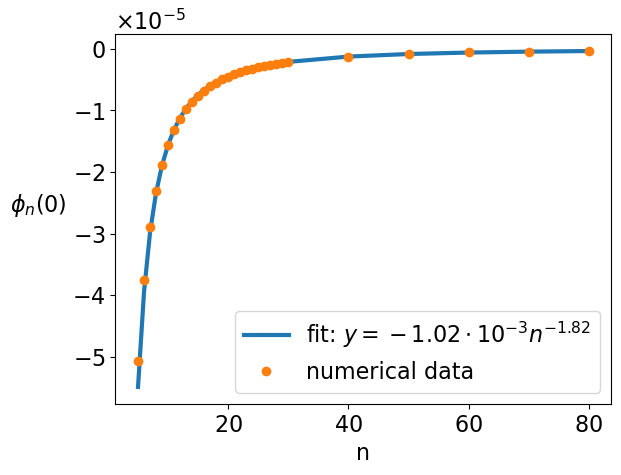

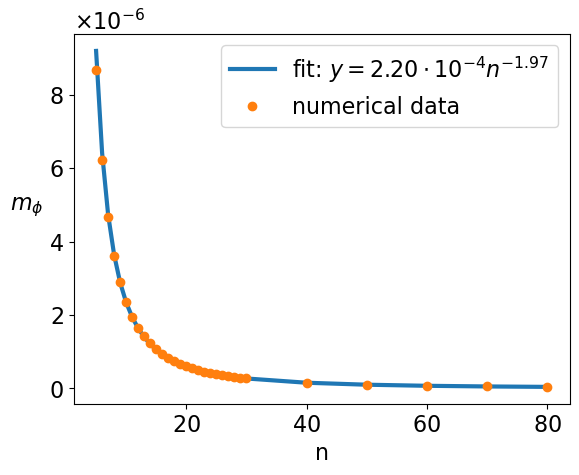

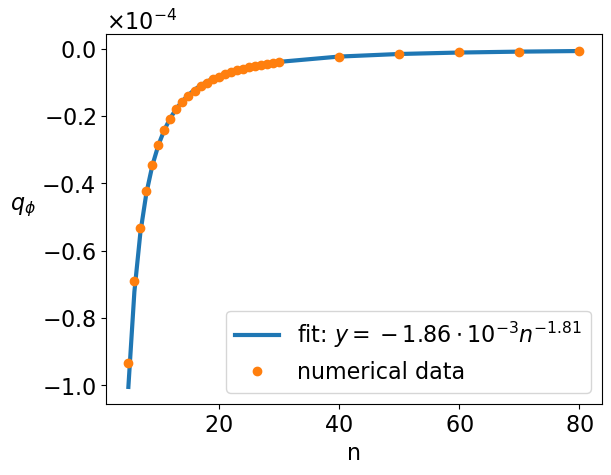

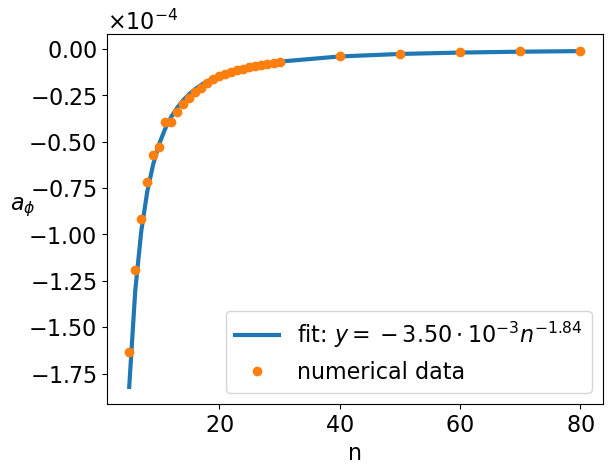

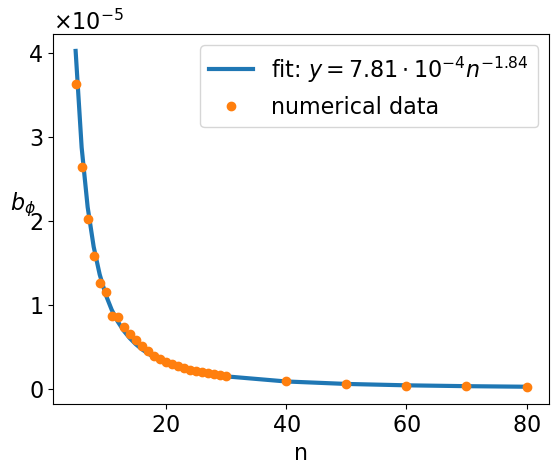

In [15]:
import os
import numpy as np
from scipy import integrate
import matplotlib.pyplot as  plt
from matplotlib import colormaps

import importlib
import NumParam as nn
importlib.reload(nn)

#n values (for plot and for fit)
nVec = np.concatenate(( np.arange(5,31) , np.array([40,50,60,70,80]) ))
nVecPlot = np.array([20,25,30])
#set colors
cmap = colormaps.get_cmap('winter') #'jet'
cols = np.array([cmap(i*1./(len(nVecPlot)-1))  for i in range(len(nVecPlot))])
#values to be saved
p0_vec = np.zeros_like(nVec, dtype=float)
m1_vec = np.zeros_like(nVec, dtype=float)
q1_vec = np.zeros_like(nVec, dtype=float)
a_vec  = np.zeros_like(nVec, dtype=float)
b_vec  = np.zeros_like(nVec, dtype=float)

for n in nVec:
    # load num data
    filepath = os.path.join(dirResults+"/rpNumData", "rpNumData_n"+str(n).zfill(3)+".dat")
    r,p = np.loadtxt(filepath, dtype=float, unpack=True)

    #p0
    p0_vec[np.where(nVec==n)] = p[0]
    #compute phi(r) derivatives 
    dr = r[1]-r[0]
    dpdr = (p[2:]-p[:-2])/(2*dr) #first order central difference scheme
    ddpddr = (p[2:]-2*p[1:-1]+p[:-2])/ dr**2 #second order central difference scheme
    dddpdddr = (dpdr[2:]-2*dpdr[1:-1]+dpdr[:-2])/ dr**2 #third order central difference scheme

    #compute rStart (same as eigenfunction)
    rStart_f = nn.m_rStart*n +nn.q_rStart
    idxStart = np.argmin([np.abs(r-rStart_f)])
    #compute rOut (same as eigenfunction)
    rOut_f   = nn.a_rOut_f*n**2 +nn.b_rOut_f*n +nn.c_rOut_f 
    idxOut = np.argmin([np.abs(r-rOut_f)])
    #compute rEnd (same as eigenfunction)
    rMin_f   = nn.a_rMin*n**2 +nn.b_rMin*n +nn.c_rMin
    idxMin = np.argmin([np.abs(r-rMin_f)])
    rEnd_f   = rMin_f**0.95
    idxEnd = np.argmin([np.abs(r-rEnd_f)])

    #FITTING
    #from rStart to rEnd: log law: p = m*log(r) + q 
    m1,q1 = np.polyfit( np.log(r[idxStart:idxEnd]),p[idxStart:idxEnd] ,1)
    m1_vec[np.where(nVec==n)] = m1
    q1_vec[np.where(nVec==n)] = q1
    #from rOut to the end: exp decay: -p = b e^ar --> log(-p) = log(b) +ar
    m2,q2 = np.polyfit( r[idxOut:],np.log(-p[idxOut:]) ,1)
    a_vec[np.where(nVec==n)] = m2
    b_vec[np.where(nVec==n)] = np.exp(q2)

    #PLOTTING
    # - phi(r)
    if n in nVecPlot:
        plt.figure(1)
        plt.plot(r,p,color=cols[np.where(nVecPlot==n)],label=f"numerical, n={n}")
        if n==nVec[-1]:
            plt.plot(r[idxStart:idxEnd] ,m1 *np.log(r[idxStart:idxEnd])+q1,'--',color="black" ,label="log law")
            plt.plot(r[idxOut:], -np.exp(q2)*np.exp(m2*r[idxOut:]),'--',color="red",label="exp decay")
            plt.plot(r[idxStart],p[idxStart],'o',color="black",label=f"start point")
            plt.plot(r[idxEnd],p[idxEnd],'o',color="orange",label=f"end point")
            plt.plot(r[idxOut],p[idxOut],'o',color="red",label=f"outer point")
        else:
            plt.plot(r[idxStart:idxEnd] ,m1 *np.log(r[idxStart:idxEnd])+q1,'--',color="black" ,label="")
            plt.plot(r[idxOut:], -np.exp(q2)*np.exp(m2*r[idxOut:]),'--',color="red",label="")
            plt.plot(r[idxStart],p[idxStart],'o',color="black",label=f"")
            plt.plot(r[idxEnd],p[idxEnd],'o',color="orange",label=f"")
            plt.plot(r[idxOut],p[idxOut],'o',color="red",label=f"")
    
    # - first deriv
    if n in nVecPlot:
        plt.figure(2)
        plt.plot(r[1:-1],dpdr,color=cols[np.where(nVecPlot==n)],label=f"n {n}")
        if n==nVec[-1]:
            plt.plot(r[idxStart],dpdr[idxStart],'o',color="black",label=f"start point")
            plt.plot(r[idxEnd],dpdr[idxEnd],'o',color="orange",label=f"end point")
            plt.plot(r[idxOut],dpdr[idxOut],'o',color="red",label=f"outer point")
        else:
            plt.plot(r[idxStart],dpdr[idxStart],'o',color="black",label=f"")
            plt.plot(r[idxEnd],dpdr[idxEnd],'o',color="orange",label=f"")
            plt.plot(r[idxOut],dpdr[idxOut],'o',color="red",label=f"")
    
    # - second deriv
    if n in nVecPlot:
        plt.figure(3)
        plt.plot(r[1:-1],ddpddr,color=cols[np.where(nVecPlot==n)],label=f"n {n}")
        if n==nVec[-1]:
            plt.plot(r[idxStart],ddpddr[idxStart],'o',color="black",label=f"start point")
            plt.plot(r[idxEnd],ddpddr[idxEnd],'o',color="orange",label=f"end point")
            plt.plot(r[idxMin],ddpddr[idxMin],'o',color="green",label=f"min point")
            plt.plot(r[idxOut],ddpddr[idxOut],'o',color="red",label=f"outer point")
        else:
            plt.plot(r[idxStart],ddpddr[idxStart],'o',color="black",label=f"")
            plt.plot(r[idxEnd],ddpddr[idxEnd],'o',color="orange",label=f"")
            plt.plot(r[idxMin],ddpddr[idxMin],'o',color="green",label=f"")
            plt.plot(r[idxOut],ddpddr[idxOut],'o',color="red",label=f"")
    
    
#set figure details
# - phi(r)
plt.figure(1)
plt.axhline(y=0, color='black',linewidth='0.7',alpha=0.7)
plt.legend()
plt.xlabel("r")
plt.ylabel(r"$\phi$(r)")
plt.gca().yaxis.label.set(rotation='horizontal', ha='right')
#save figure
figname = "fitp_nVary"
figpath = os.path.join(dirOutFig+"/potential",figname)
plt.savefig(figpath,dpi=300,bbox_inches = 'tight')
# - phi'(r)
plt.figure(2)
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.xlabel("r")
plt.ylabel(r"$\phi'$(r)")
plt.gca().yaxis.label.set(rotation='horizontal', ha='right')
# - phi''(r)
plt.figure(3)
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.xlabel("r")
plt.ylabel(r"$\phi''$(r)")
plt.gca().yaxis.label.set(rotation='horizontal', ha='right')

#PLOTS AS n VARY
#--- phi0 -------------------------------------
#fit 
m,q =np.polyfit(np.log(nVec),np.log(-p0_vec),1)
#plot 
plt.figure()    
plt.plot(nVec, -np.exp(q) *nVec**m,label=f"fit: $y={latex_float(-np.exp(q))} n^{{{latex_float(m)}}}$")
plt.plot(nVec,p0_vec,'o',label="numerical data")
plt.legend()
plt.xlabel("n")
plt.ylabel(r"$\phi_n(0)$")
plt.gca().yaxis.label.set(rotation='horizontal', ha='right')
#save figure
figname = "phiZeroFit"
figpath = os.path.join(dirOutFig+"/potential",figname)
plt.savefig(figpath,dpi=300,bbox_inches = 'tight')
#print
print(f"alpha_phi0 = {m:.8e}")
print(f"beta_phi0  = {-np.exp(q):.8e}\n")

#--- m1 ---------------------------------------------------
#fit 
m,q =np.polyfit(np.log(nVec),np.log(m1_vec),1)
#plot
plt.figure()    
plt.plot(nVec, np.exp(q) *nVec**m,label=f"fit: $y={latex_float(np.exp(q))} n^{{{latex_float(m)}}}$")
plt.plot(nVec,m1_vec,'o',label="numerical data")
plt.legend()
plt.xlabel("n")
plt.ylabel("$m_{\phi}$")
plt.gca().yaxis.label.set(rotation='horizontal', ha='right')
#save figure
figname = "logMFit"
figpath = os.path.join(dirOutFig+"/potential",figname)
plt.savefig(figpath,dpi=300,bbox_inches = 'tight')
#print
print(f"alpha_m = {m:.8e}")
print(f"beta_m  = {np.exp(q):.8e}\n")

#--- q1 ----------------------------------------
#fit 
m,q =np.polyfit(np.log(nVec),np.log(-q1_vec),1)
#plot 
plt.figure()    
plt.plot(nVec, -np.exp(q) *nVec**m,label=f"fit: $y={latex_float(-np.exp(q))} n^{{{latex_float(m)}}}$")
plt.plot(nVec,q1_vec,'o',label="numerical data")
plt.legend()
plt.xlabel("n")
plt.ylabel("$q_{\phi}$")
plt.gca().yaxis.label.set(rotation='horizontal', ha='right')
#save figure
figname = "logQFit"
figpath = os.path.join(dirOutFig+"/potential",figname)
plt.savefig(figpath,dpi=300,bbox_inches = 'tight')
#print
print(f"alpha_q = {m:.8e}")
print(f"beta_q  = {-np.exp(q):.8e}\n")

#--- a ---------------------------------------------
#fit 
m,q =np.polyfit(np.log(nVec),np.log(-a_vec),1) 
#plot 
plt.figure()    
plt.gca().yaxis.label.set(rotation='horizontal', ha='right')
plt.plot(nVec, -np.exp(q) *nVec**m,label=f"fit: $y={latex_float(-np.exp(q))} n^{{{latex_float(m)}}}$")
plt.plot(nVec,a_vec,'o',label="numerical data")
plt.legend()
plt.xlabel("n")
plt.ylabel("$a_{\phi}$")
#save figure
figname = "expAFit"
figpath = os.path.join(dirOutFig+"/potential",figname)
plt.savefig(figpath,dpi=300,bbox_inches = 'tight')
#print
print(f"alpha_a = {m:.8e}")
print(f"beta_a  = {-np.exp(q):.8e}\n")

#--- b --------------------------------------------
#fit
m,q =np.polyfit(np.log(nVec),np.log(b_vec),1) 
#plot 
plt.figure()    
plt.gca().yaxis.label.set(rotation='horizontal', ha='right')
plt.plot(nVec, np.exp(q) *nVec**m,label=f"fit: $y={latex_float(np.exp(q))} n^{{{latex_float(m)}}}$") 
plt.plot(nVec,b_vec,'o',label="numerical data")
plt.legend()
plt.xlabel("n")
plt.ylabel("$b_{\phi}$")
#save figure
figname = "expBFit"
figpath = os.path.join(dirOutFig+"/potential",figname)
plt.savefig(figpath,dpi=300,bbox_inches = 'tight')
#print
print(f"alpha_b = {m:.8e}")
print(f"beta_b  = {np.exp(q):.8e}\n")



# EIGENVELOCITIES

---

## 1. Fits

alpha_slope = -2.86468831e+00
beta_slope  = 2.81644734e-05

alpha_interc = -9.58831961e-01
beta_interc = 1.26195529e-02

a_rOut = 132.98418795903186
b_rOut = 244.6101536051851
c_rOut = -185.32041639205738

alpha_vOut = -0.49569090723881976
beta_vOut  = 0.2657948172660721

m_rInn = 40.092911709640575
q_rInn = 124.33889924566756

alpha_vInn = -1.1435286503688644
beta_vInn  = 1.9410777328447457



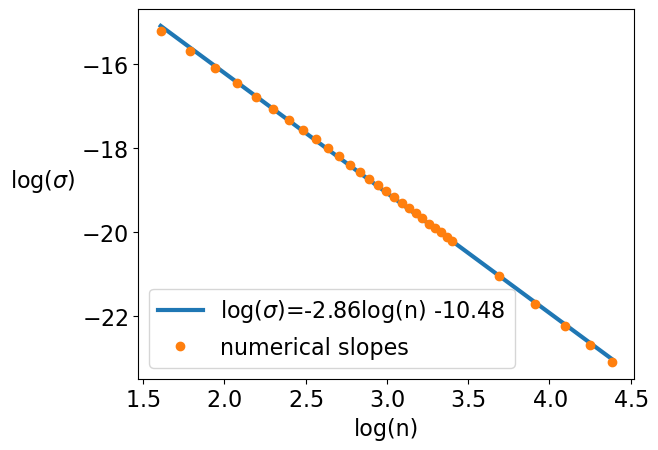

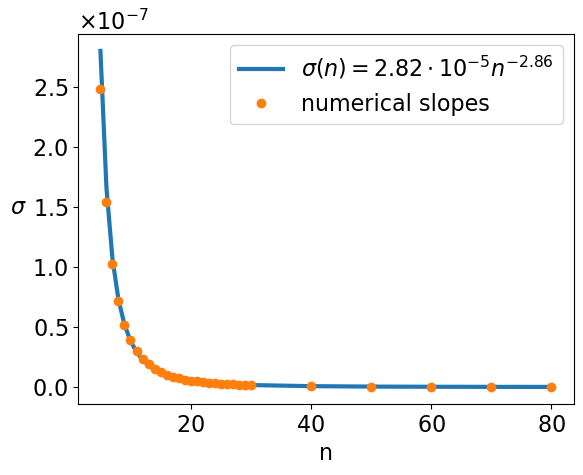

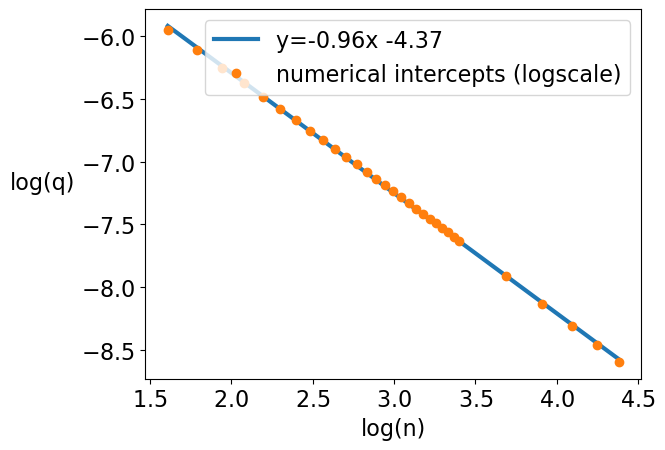

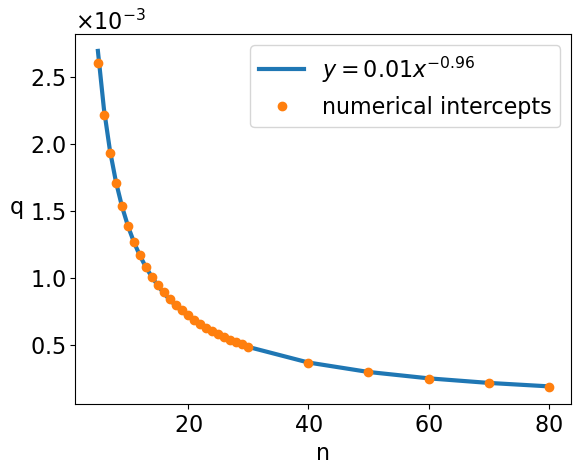

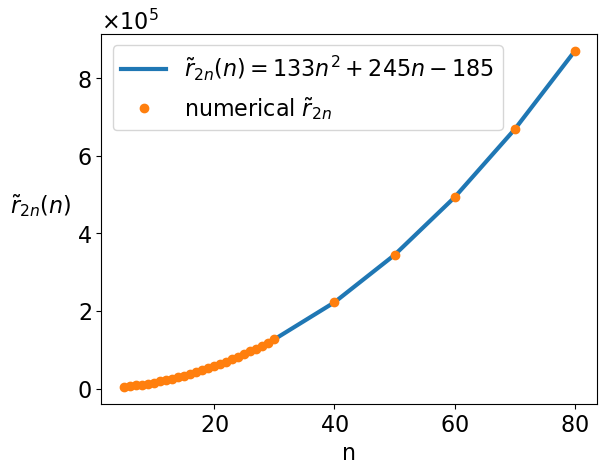

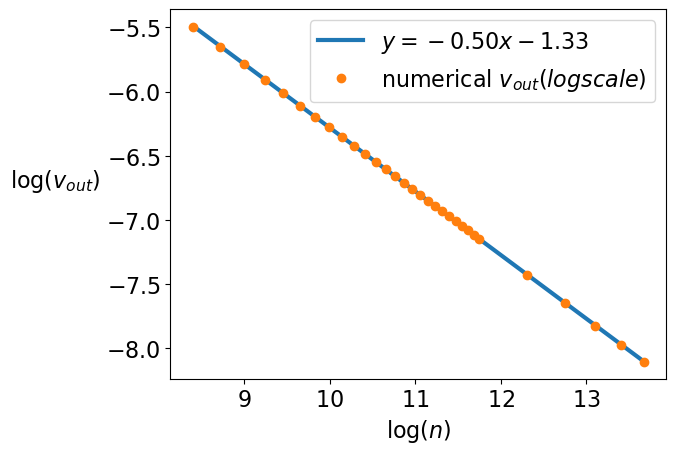

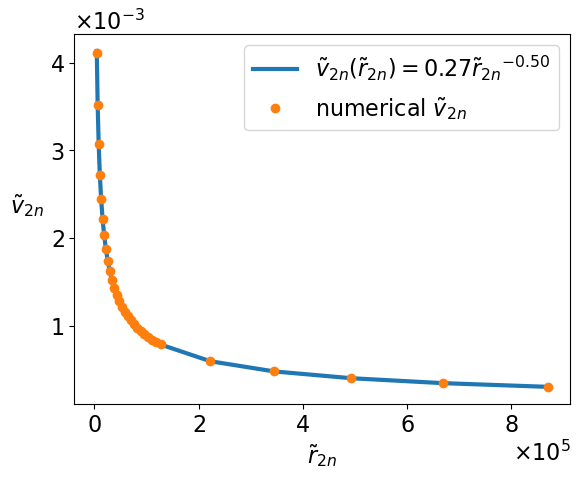

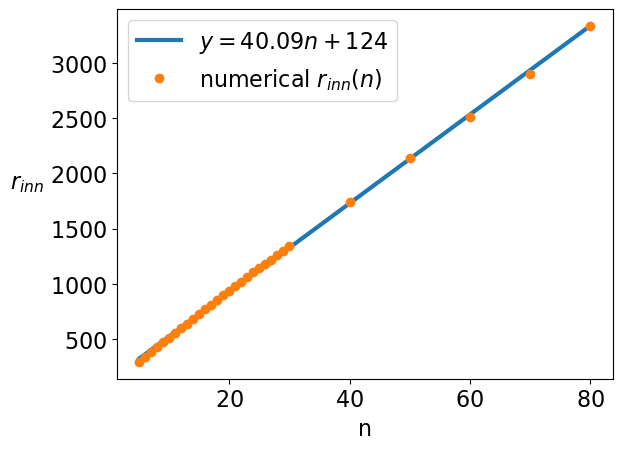

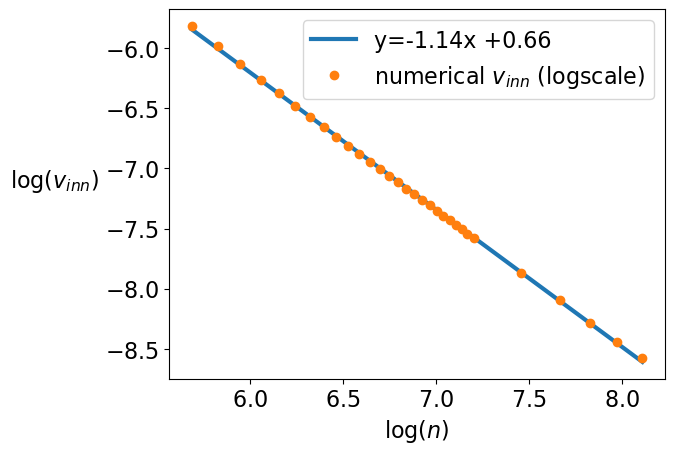

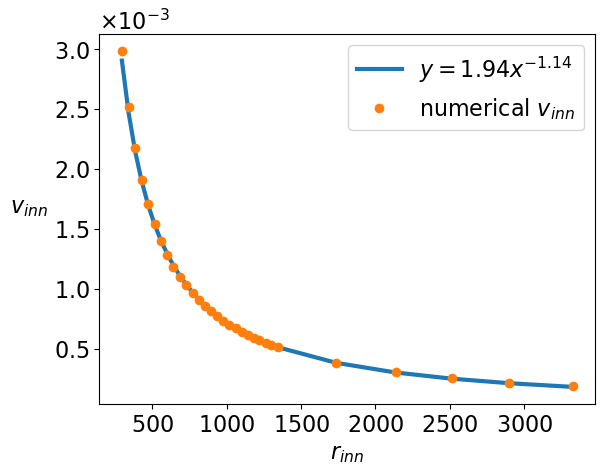

In [16]:
import os
import numpy as np
import matplotlib.pyplot as  plt
from matplotlib import colormaps

# n values (for plot and for fit)
nVec = np.concatenate(( np.arange(5,31) , np.array([40,50,60,70,80]) ))
nVecPlot = np.array([7,8,9,10])
#values to be saved
mSlope = np.zeros_like(nVec,dtype=float)
qSlope = np.zeros_like(nVec,dtype=float)
rOut   = np.zeros_like(nVec,dtype=float)
vOut   = np.zeros_like(nVec,dtype=float)
rInn   = np.zeros_like(nVec,dtype=float)
vInn   = np.zeros_like(nVec,dtype=float)
#set colors
cmap = colormaps.get_cmap('winter') #'jet'
cols = [cmap(i*1./(len(nVecPlot)-1))  for i in range(len(nVecPlot))]
colCount = 0
for i in nVec:
    #load num curves
    filepath = os.path.join(dirResults+"/rvNumData", "rvNumData_n"+str(i).zfill(3)+".dat")
    r,v = np.loadtxt(filepath, dtype=float,unpack=True)

    #extract vmax,rmax local extrema
    derivForw = v[2:]-v[1:-1]
    derivBackw = v[1:-1]-v[:-2]
    changeSign=derivBackw*derivForw
    idxMax = (np.where(changeSign<0)[0] +1)[:2*i+1:2]
    rMax = r[idxMax]
    vMax = v[idxMax]
    #save Innermost extremum and Outermost extremum
    rInn[np.where(nVec==i)] = rMax[ 0]
    vInn[np.where(nVec==i)] = vMax[ 0]
    rOut[np.where(nVec==i)] = rMax[-1]
    vOut[np.where(nVec==i)] = vMax[-1]

    #linear fit between start vmax, end vmax - save slopes (and intercepts)
    idxLeft  = idxMax[ round(i*0.1) ]
    idxRight = idxMax[ round(i*0.9) ]
    m,q = np.polyfit( r[idxLeft:idxRight], v[idxLeft:idxRight], 1)
    mSlope[np.where(nVec==i)] = m
    qSlope[np.where(nVec==i)] = q

#------------------------------------------------------------------------------------
# slope(n) - linear fit in log scale 
m_slope,q_slope = np.polyfit( np.log(nVec), np.log(mSlope), 1)
#plot
plt.figure()    
plt.plot(np.log(nVec),m_slope*np.log(nVec)+q_slope,'-',label=f"log($\sigma$)={latex_float(m_slope)}log(n) {latex_float(q_slope)}")
plt.plot(np.log(nVec),np.log(mSlope),'o',label="numerical slopes")
plt.xlabel("log(n)")
plt.ylabel("log($\sigma$)")
plt.legend()
plt.gca().yaxis.label.set(rotation='horizontal', ha='right')
#save figure
figname = "slopesFit_logScale"
figpath = os.path.join(dirOutFig+"/velocity",figname)
plt.savefig(figpath,dpi=300,bbox_inches = 'tight')

#slope(n) - fit in original scale 
plt.figure()    
plt.plot(nVec,np.e**q_slope *nVec**m_slope,'-',label=f"$\sigma(n)= {latex_float(np.e**q_slope)} n^{{{latex_float(m_slope)}}}$")
plt.plot(nVec,mSlope,'o',label="numerical slopes")
plt.xlabel("n")
plt.ylabel("$\sigma$")
plt.legend()
plt.gca().yaxis.label.set(rotation='horizontal', ha='right')
#save figure
figname = "slopesFit"
figpath = os.path.join(dirOutFig+"/velocity",figname)
plt.savefig(figpath,dpi=300,bbox_inches = 'tight')

#print parameters of fit: slopes(n) = gamma n^delta
print(f"alpha_slope = {m_slope:.8e}")
print(f"beta_slope  = {np.e**q_slope:.8e}\n")

#------------------------------------------------------------------------------------
#q(n) - linear fit in log scale 
m_interc,q_interc = np.polyfit( np.log(nVec), np.log(qSlope), 1)
#plot
plt.figure()    
plt.plot(np.log(nVec),m_interc*np.log(nVec)+q_interc,'-',label=f"y={latex_float(m_interc)}x {latex_float(q_interc)}")
plt.plot(np.log(nVec),np.log(qSlope),'o',label="numerical intercepts (logscale)")
plt.xlabel("log(n)")
plt.ylabel("log(q)")
plt.legend()
plt.gca().yaxis.label.set(rotation='horizontal', ha='right')

#q(n) - fit in original scale 
plt.figure()    
plt.plot(nVec,np.e**q_interc *nVec**m_interc,'-',label=f"$y= {latex_float(np.e**q_interc)} x^{{{latex_float(m_interc)}}}$")
plt.plot(nVec,qSlope,'o',label="numerical intercepts")
plt.xlabel("n")
plt.ylabel("q")
plt.legend()
plt.gca().yaxis.label.set(rotation='horizontal', ha='right')
#save figure
figname = "interceptsFit"
figpath = os.path.join(dirOutFig+"/velocity",figname)
plt.savefig(figpath,dpi=300,bbox_inches = 'tight')

#print parameters of fit: q(n) =  gamma n^delta
print(f"alpha_interc = {m_interc:.8e}")
print(f"beta_interc = {np.e**q_interc:.8e}\n")

#------------------------------------------------------------------------------------
#rOut fit:  rOut(n) = an^2 +bn +c
a_rOut,b_rOut,c_rOut = np.polyfit(nVec,rOut, 2)
#plot
plt.figure()    
plt.plot(nVec,a_rOut*nVec**2+b_rOut*nVec+c_rOut,'-',label=r"$\tilde{{r}}_{{2n}}(n)$"+f"$= {latex_float(a_rOut)} n^2 +{latex_float(b_rOut)} n {latex_float(c_rOut)}$")
plt.plot(nVec,rOut,'o',label=r"numerical $\tilde{{r}}_{{2n}}$")
plt.xlabel("n")
plt.ylabel(r"$\tilde{{r}}_{{2n}}(n)$")
plt.legend()
plt.gca().yaxis.label.set(rotation='horizontal', ha='right')
#save figure
figname = "rOutFit"
figpath = os.path.join(dirOutFig+"/velocity",figname)
plt.savefig(figpath,dpi=300,bbox_inches = 'tight')
#print
print(f"a_rOut = {a_rOut}")
print(f"b_rOut = {b_rOut}")
print(f"c_rOut = {c_rOut}\n")

#vOut fit:  vOut(rOut) = beta rOut^alfa in logscale
m_vOut,q_vOut = np.polyfit( np.log(rOut), np.log(vOut), 1)
#plot
plt.figure()    
plt.plot(np.log(rOut),m_vOut*np.log(rOut)+q_vOut,'-',label=f"$y={latex_float(m_vOut)}x {latex_float(q_vOut)}$")
plt.plot(np.log(rOut),np.log(vOut),'o',label="numerical $v_{{out}} (logscale)$")
plt.xlabel("$\\log(n)$")
plt.ylabel("$\\log(v_{{out}})$")
plt.legend()
plt.gca().yaxis.label.set(rotation='horizontal', ha='right')

#vOut fit: in original scale
plt.figure()    
plt.plot(rOut,np.e**q_vOut *rOut**m_vOut,'-',label=r"$\tilde{{v}}_{{2n}}(\tilde{{r}}_{{2n}})=$"+f"$ {latex_float(np.e**q_vOut)}$"+r"$\tilde{{r}}_{{2n}}$"+f"$^{{{latex_float(m_vOut)}}}$")
plt.plot(rOut,vOut,'o',label=r"numerical $\tilde{{v}}_{{2n}}$")
plt.xlabel(r"$\tilde{{r}}_{{2n}}$")
plt.ylabel(r"$\tilde{{v}}_{{2n}}$")
plt.legend()
plt.gca().yaxis.label.set(rotation='horizontal', ha='right')
#save figure
figname = "vOutFit"
figpath = os.path.join(dirOutFig+"/velocity",figname)
plt.savefig(figpath,dpi=300,bbox_inches = 'tight')

#print
print(f"alpha_vOut = {m_vOut}")
print(f"beta_vOut  = {np.e**q_vOut}\n")

#---------------------------------------------------------------------------------------------------
#rInn fit:  rInn(n) = mn +q 
m_rInn,q_rInn = np.polyfit( nVec, rInn, 1)
#plot
plt.figure()    
plt.plot(nVec,m_rInn*nVec+q_rInn,'-',label=f"$y= {latex_float(m_rInn)} n +{latex_float(q_rInn)}$")
plt.plot(nVec,rInn,'o',label="numerical $r_{{inn}}(n)$")
plt.xlabel("n")
plt.ylabel("$r_{{inn}}$")
plt.legend()
plt.gca().yaxis.label.set(rotation='horizontal', ha='right')
#save figure
figname = "rInnFit"
figpath = os.path.join(dirOutFig+"/velocity",figname)
plt.savefig(figpath,dpi=300,bbox_inches = 'tight')

#print
print(f"m_rInn = {m_rInn}")
print(f"q_rInn = {q_rInn}\n")

#vInn fit:  vInn(rInn) = beta rInn^alfa in logscale fit
m_vInn,q_vInn = np.polyfit( np.log(rInn), np.log(vInn), 1)
#plot
plt.figure()    
plt.plot(np.log(rInn),m_vInn*np.log(rInn)+q_vInn,'-',label=f"y={latex_float(m_vInn)}x +{latex_float(q_vInn)}")
plt.plot(np.log(rInn),np.log(vInn),'o',label="numerical $v_{{inn}}$ (logscale)")
plt.xlabel("$\\log(n)$")
plt.ylabel("$\\log(v_{{inn}})$")
plt.legend()
plt.gca().yaxis.label.set(rotation='horizontal', ha='right')

#vInn fit: in original fit
plt.figure()    
plt.plot(rInn,np.e**q_vInn *rInn**m_vInn,'-',label=f"$y= {latex_float(np.e**q_vInn)} x^{{{latex_float(m_vInn)}}}$")
plt.plot(rInn,vInn,'o',label="numerical $v_{{inn}}$")
plt.xlabel("$r_{{inn}}$")
plt.ylabel("$v_{{inn}}$")
plt.legend()
plt.gca().yaxis.label.set(rotation='horizontal', ha='right')
#save figure
figname = "vInnFit"
figpath = os.path.join(dirOutFig+"/velocity",figname)
plt.savefig(figpath,dpi=300,bbox_inches = 'tight')

#print
print(f"alpha_vInn = {m_vInn}")
print(f"beta_vInn  = {np.e**q_vInn}\n")





## 2. Universality

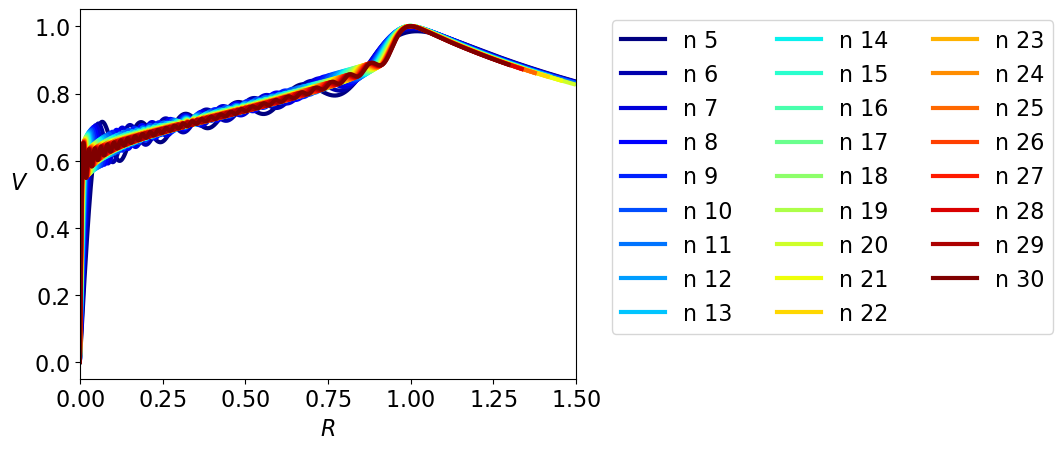

In [17]:
import os
import numpy as np
import matplotlib.pyplot as  plt
from matplotlib import colormaps
import importlib

import NumParam as nn
importlib.reload(nn)

#sample n for plot
nVec = np.arange(5,31) 

#set colors
cmap = colormaps.get_cmap('jet') 
cols = [cmap(i*1./(len(nVec)-1))  for i in range(len(nVec))]

plt.figure()    
for n in nVec:
    #load num curves
    filepath = os.path.join(dirResults+"/rvNumData", "rvNumData_n"+str(n).zfill(3)+".dat")
    r,v = np.loadtxt(filepath, dtype=float,unpack=True)
    #define scaling
    rScale = nn.a_rOut*n**2 + nn.b_rOut*n + nn.c_rOut
    vScale = nn.beta_vOut * rScale**nn.alpha_vOut
    #plot rescaled
    plt.figure(1)
    plt.plot(r/rScale, v/vScale,'-',color=cols[list(nVec).index(n)],label="n "+str(n))
plt.xlabel('$R$')
plt.ylabel('$V$')
plt.xlim([0,1.5])
plt.legend(bbox_to_anchor=(1.05,1.0),loc='upper left',ncols=3)
plt.gca().yaxis.label.set(rotation='horizontal', ha='right')
#save figure
figname = "numVel_universality"
figpath = os.path.join(dirOutFig+"/velocity",figname)
plt.savefig(figpath,dpi=300, bbox_inches='tight')

## 3. Approximate eigenvelocity

Based on the scaling laws obtained in the previous analysis, this function produces an approximation for $v_n(r)$, avoiding the complete numerical simulation of the eigenstate.
The approximation accounts for the first local maximum, the linear fit of the midrange local extrema, and the outermost local maximum.

m: 9.246377003902703e-11	n: 15	slope: 1.2038344136109415e-08	interc: 0.0009405244288877934


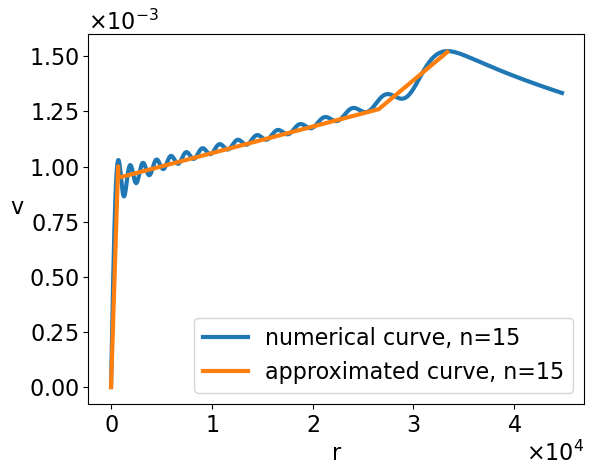

In [18]:
import os
import numpy as np
import matplotlib.pyplot as  plt

import NumParam as nn
importlib.reload(nn)

#n value
nVec = np.array([15])
#n values for which the exact curve is available
nAvailable = np.concatenate( (  np.arange(0,31)  ,np.array([40,50,60,70,80,90,100])  )) 

for n in nVec:
    #set approximate curves:
    # - set reference data (rInn,vInn), (rOut,vOut), slope,interc
    rInn = nn.m_rInn*n + nn.q_rInn
    vInn = nn.beta_vInn *rInn**nn.alpha_vInn
    rOut = nn.a_rOut*n**2 + nn.b_rOut*n + nn.c_rOut
    vOut = nn.beta_vOut *rOut**nn.alpha_vOut
    slope  = nn.beta_slope *n**nn.alpha_slope
    interc = nn.beta_interc *n**nn.alpha_interc
    print(f"m: {m}\tn: {n}\tslope: {slope}\tinterc: {interc}")
    # - set domain
    rApprox = np.linspace(0.0, rOut*1.1,1000)
    idx_rInn = np.abs(rApprox-rInn).argmin()
    idx_rOut = np.abs(rApprox-rOut).argmin()
    idxLeft_loc  = np.round(n*0.1).astype(int) #linear behavior starts at   (idxLeft_loc)-th  local maxima
    idxRight_loc = np.round(n*0.9).astype(int) #linear behavior ends at     (idxRight_loc)-th local maxima 
    idx_endLine   = np.abs(rApprox-   (rInn+(rOut*0.85-rInn)*idxRight_loc/n)   ).argmin() #IMBROGLIATO
    r_endLine = rApprox[idx_endLine]
    v_endLine = slope*r_endLine +interc
    # - set params for linear segments
    m1,q1 = np.polyfit( np.array([0.0,rInn]), np.array([0.0,vInn]), 1)
    m3,q3 = np.polyfit( np.array([r_endLine,rOut]),np.array([v_endLine,vOut]),1)
    # - set approximate curve
    vApprox = np.zeros_like(rApprox)
    vApprox[0:idx_rInn] = m1*rApprox[0:idx_rInn] + q1
    vApprox[idx_rInn:idx_endLine] = slope*rApprox[idx_rInn:idx_endLine] +interc
    vApprox[idx_endLine:idx_rOut] = m3*rApprox[idx_endLine:idx_rOut] +q3
    vApprox[idx_rOut:] = None

    #plot 
    plt.figure()    
    if np.any(nAvailable == n): #available exact numerical curve
        #load num curves
        filepath = os.path.join(dirResults+"/rvNumData", "rvNumData_n"+str(n).zfill(3)+".dat")
        r,v = np.loadtxt(filepath, dtype=float,unpack=True)
        plt.plot(r,v,'-',label=f"numerical curve, n={n}")
    plt.plot(rApprox,vApprox,'-',label=f"approximated curve, n={n}")
    plt.xlabel("r")
    plt.ylabel("v")
    plt.legend()
    plt.gca().yaxis.label.set(rotation='horizontal', ha='right')

    
    

# WKB APPROXIMATION
---

[None, None]

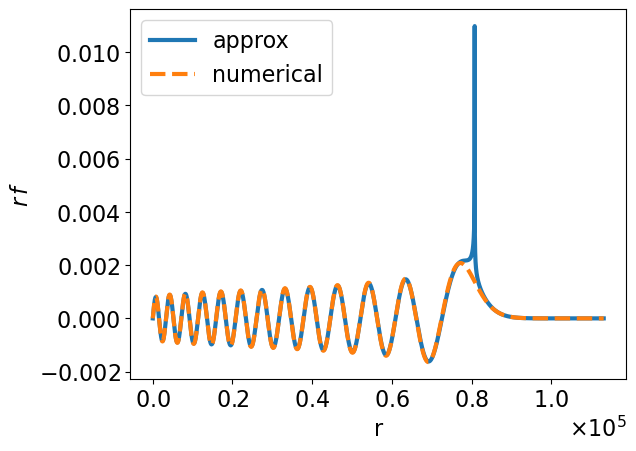

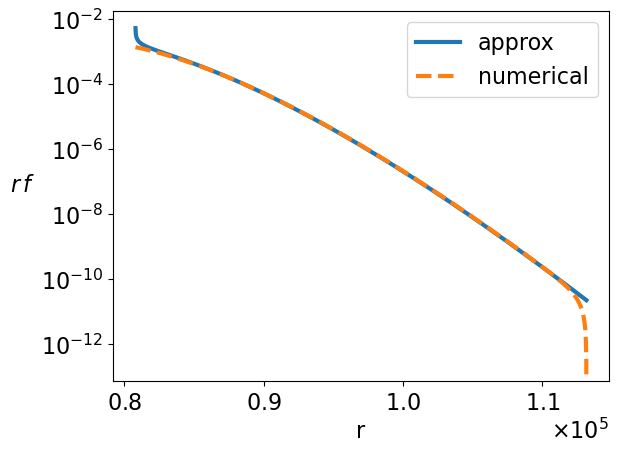

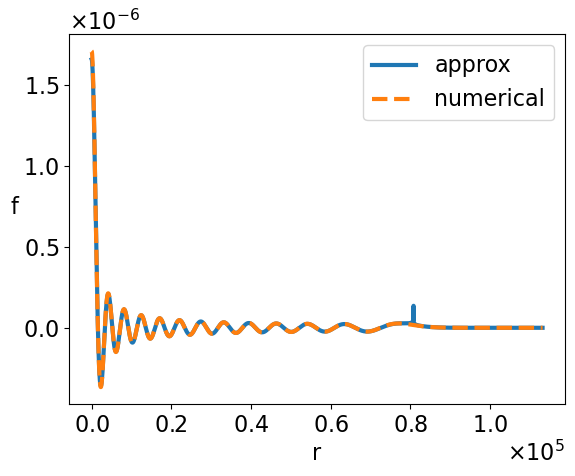

In [19]:
import os
import numpy as np
from scipy import integrate
import matplotlib.pyplot as  plt

#n value
n=24

# load num data
filepath = os.path.join(dirResults+"/neNumData", "neNumData.dat")
eigval = np.loadtxt(filepath, dtype=float, unpack=True)[1,n] #fino a n=30 ok
filepath = os.path.join(dirResults+"/rfNumData", "rfNumData_n"+str(n).zfill(3)+".dat")
r,f = np.loadtxt(filepath, dtype=float, unpack=True)
filepath = os.path.join(dirResults+"/rpNumData", "rpNumData_n"+str(n).zfill(3)+".dat")
r,p = np.loadtxt(filepath, dtype=float, unpack=True)

g = eigval+2*p
idxR = np.argmin(np.abs(g))+1 #R tc G(R)==0; +1 to be sure g(r>R) is positive
uApprox = np.zeros_like(r)
integrSin = integrate.cumulative_trapezoid(np.sqrt(-g[:idxR]), r[:idxR], initial=0)
integrExp = integrate.cumulative_trapezoid(np.sqrt( g[idxR:]), r[idxR:], initial=0)
uApprox[:idxR] = np.sin( integrSin -integrSin[0]) / (-g[:idxR])**0.25 
uApprox[idxR:] = np.exp(-integrExp) / g[idxR:]**0.25    

# scale factor, to be set by hand
c1 = 0.000036    
c2 = 0.000018

# rescale uApprox
uApprox[:idxR] = uApprox[:idxR]*c1
uApprox[idxR:] = uApprox[idxR:]*c2

# # CHECK: print central values
# print(f"f0 num = {f[0]}")
# print(f"f0 wkb = {c1*(2*(-p[0])-eigval)**0.25}")

plt.figure()    
plt.plot(r,uApprox,label="approx")
plt.plot(r,f*r,'--',label="numerical")
plt.legend()
plt.xlabel("r")
plt.ylabel("$r\,f$")
#save figure
figname = "FermiWKB_rf"
figpath = os.path.join(dirOutFig+"/FermiWKB",figname)
plt.savefig(figpath,dpi=300, bbox_inches='tight')

plt.figure()    
plt.yscale("log")
plt.plot(r[idxR:],uApprox[idxR:],label="approx")
plt.plot(r[idxR:],f[idxR:]*r[idxR:],'--',label="numerical")
plt.xlabel("r")
plt.ylabel("$r\,f$")
plt.legend()
plt.gca().yaxis.label.set(rotation='horizontal', ha='right')
#save figure
figname = "FermiWKB_logrf"
figpath = os.path.join(dirOutFig+"/FermiWKB",figname)
plt.savefig(figpath,dpi=300, bbox_inches='tight')

plt.figure()    
plt.plot(r[1:],uApprox[1:]/r[1:],label="approx")
plt.plot(r,f,'--',label="numerical")
plt.legend()
plt.xlabel("r")
plt.ylabel("f")
plt.gca().yaxis.label.set(rotation='horizontal', ha='right')
